# Jacobi Function Original

/tmp/ipykernel_839/1991668203.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_839/1991668203.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_839/1991668203.py:17: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/home/wattie/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  

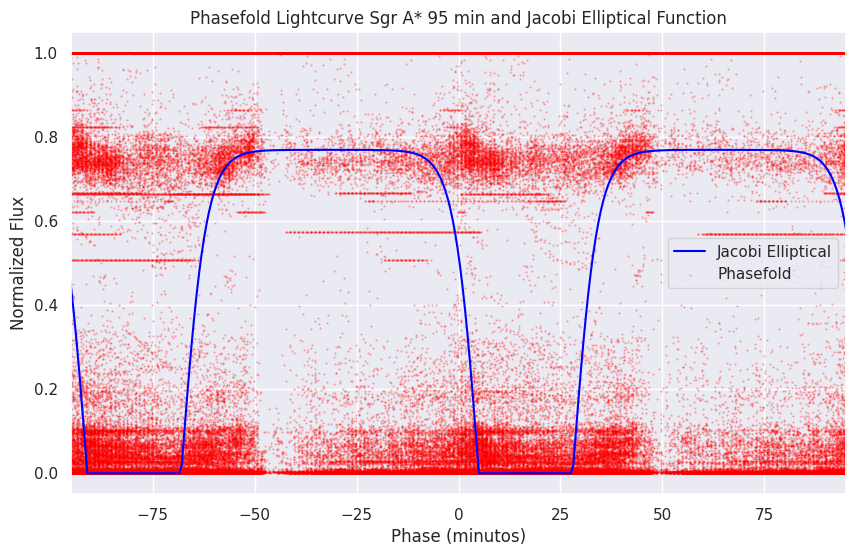

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Configuración de Seaborn
sns.set(style='darkgrid')

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

# Archivos de entrada
archivo_linea = "output_95min.dat"
# archivo_linea = "jacobi_0.86_E79.17_S18.19_m0.81_W4.0_desplazamiento5.0.dat"
archivo_scatter = "phasefolding_periodicidad_191.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] - 164

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
plt.plot(data_linea['x'], data_linea['y'], label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.3, alpha=0.3)

# Etiquetas y título
plt.xlabel("Phase (minutos)")
plt.ylabel("Normalized Flux")
plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-95,95)

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
# plt.savefig("phasefold_jacobi_95min_sample1.png", format='png', dpi=300)
plt.show()

#Ingresa la amplitud del eclipse:
#0.77
#Ingresa el periodo del eclipse:
#73
#Ingresa el periodo no eclipsado:
#23
#Ingresa el traslado vertical:
#0
#Ingresa el número de eclipses:
#4
#Ingresa la resolución:
#0.1
#Ingresa el módulo (0<m<1):
#0.9999


# Jacobi Function Eclipse Model

# 1 Periodo

/tmp/ipykernel_21214/3576876047.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_21214/3576876047.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_21214/3576876047.py:16: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


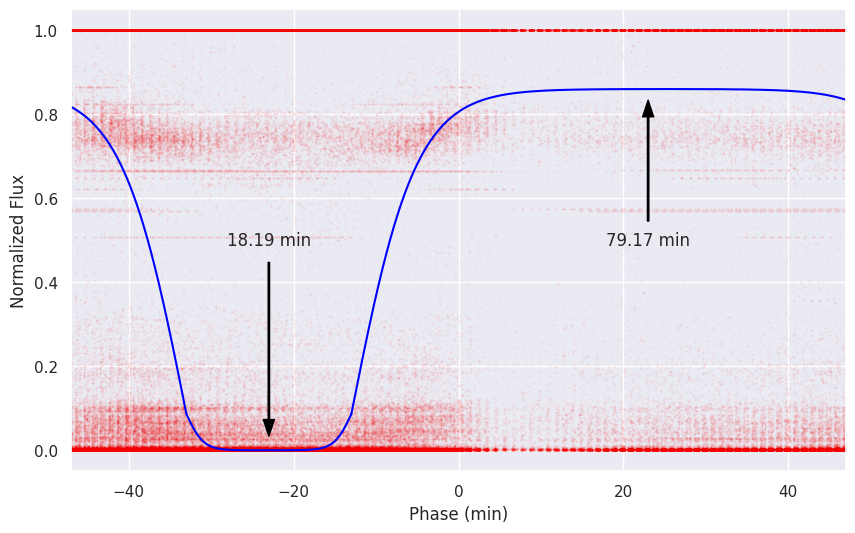

In [214]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Configuración de Seaborn
sns.set(style='darkgrid')

# Archivos de entrada
archivo_linea = "jacobi_0.86_E76.0_S20.0_m0.999_W10.0_desplazamiento10.0.dat"
# archivo_scatter = "phasefolding_periodicidad_191.dat"
archivo_scatter = "variacion_periodicidad/phasefolding_periodicidad_95.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] - 205

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# Insertamos NaN para crear discontinuidades entre tramos
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear una nueva lista para almacenar los datos con NaN para discontinuidad
x_discontinuo = []
y_discontinuo = []

for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN para interrumpir la conexión entre puntos
    if abs(x_vals[i + 1] - x_vals[i]) > 1:  # Aquí decidimos cuándo poner NaN, por ejemplo, si la diferencia es mayor a 1
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua (con NaN)
plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.1, alpha=.1)

# Añadir una flecha con un número apuntando a una coordenada específica
plt.annotate(
    '79.17 min',  # El número que quieres mostrar
    xy=(23, 0.85),  # Coordenadas de la flecha
    xytext=(23, 0.5),  # Posición del texto
    ha='center',  # Horizontally align text in the center
    va='center',  # Vertically align text in the center
    arrowprops=dict(facecolor='black', edgecolor='black', shrink=0.05, width=1, headwidth=8, lw=1)
)

# Añadir una flecha con un número apuntando a una coordenada específica
plt.annotate(
    '18.19 min',  # El número que quieres mostrar
    xy=(-23, 0.01),  # Coordenadas de la flecha
    xytext=(-23, 0.5),  # Posición del texto
    ha='center',  # Horizontally align text in the center
    va='center',  # Vertically align text in the center
    arrowprops=dict(facecolor='black', edgecolor='black', shrink=0.05, width=1, headwidth=8, lw=1)
)


# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
#plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-47, 47)

# Añadir leyenda
#plt.legend()

# Mostrar la gráfica
plt.savefig("images/phasefold_jacobi_1_periods_sample1.png", format='png', dpi=300)

plt.show()


/tmp/ipykernel_839/3982170779.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_839/3982170779.py:12: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


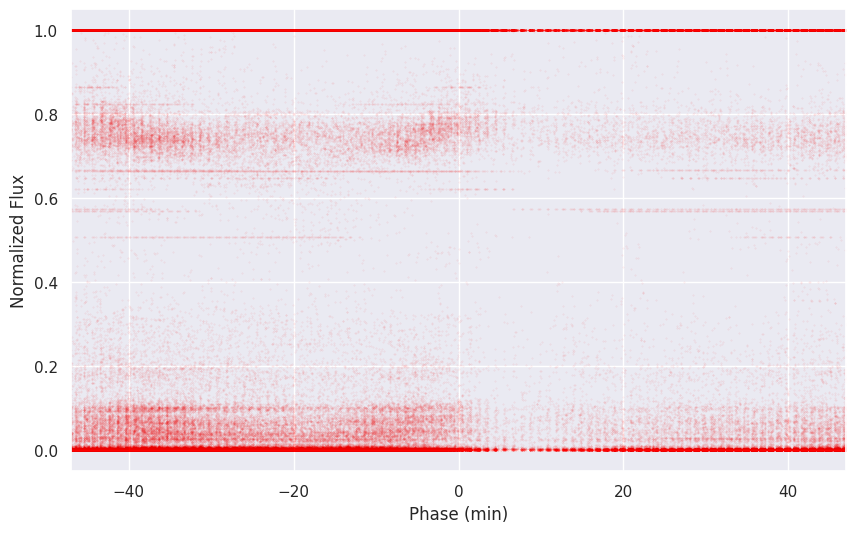

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Archivos de entrada
# archivo_linea = "output_95min.dat"
# archivo_scatter = "phasefolding_periodicidad_191.dat"
archivo_scatter = "variacion_periodicidad/phasefolding_periodicidad_95.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
# data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
# data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
# data_linea['x'] = data_linea['x'] - 158

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# plt.plot(data_linea['x'], data_linea['y'], label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.1, alpha=0.1)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
# plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-47,47)

# Añadir leyenda
# plt.legend()

# Mostrar la gráfica
plt.savefig("images/phasefold_scater_1_periods_sample1.png", format='png', dpi=300)
plt.show()



# 2 Periodos

/tmp/ipykernel_21214/1927178271.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_21214/1927178271.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_21214/1927178271.py:15: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


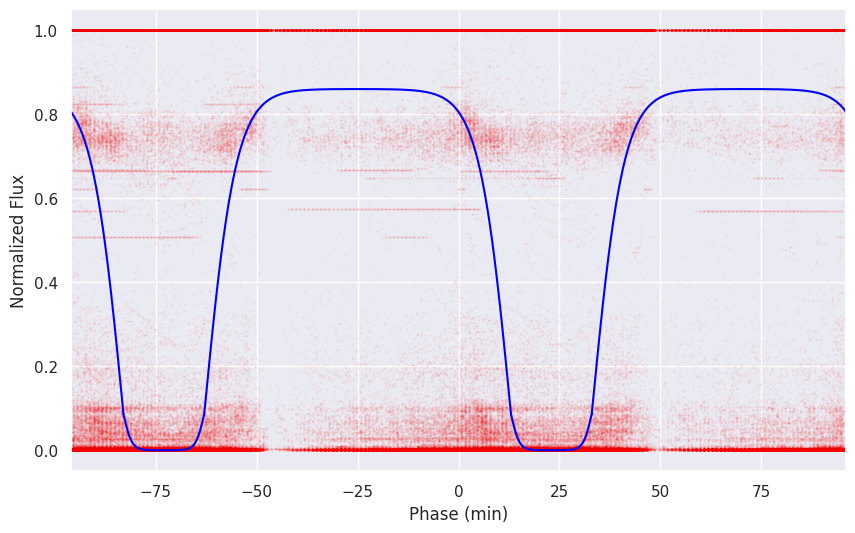

In [215]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Configuración de Seaborn
sns.set(style='darkgrid')

# Archivos de entrada
archivo_linea = "jacobi_0.86_E76.0_S20.0_m0.999_W10.0_desplazamiento10.0.dat"
archivo_scatter = "phasefolding_periodicidad_191.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] - 255

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# Insertamos NaN para crear discontinuidades entre tramos
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear una nueva lista para almacenar los datos con NaN para discontinuidad
x_discontinuo = []
y_discontinuo = []

for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN para interrumpir la conexión entre puntos
    if abs(x_vals[i + 1] - x_vals[i]) > 1:  # Aquí decidimos cuándo poner NaN, por ejemplo, si la diferencia es mayor a 1
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua (con NaN)
plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.1, alpha=.1)


# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
#plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-96, 96)

# Añadir leyenda
#plt.legend()

# Mostrar la gráfica
plt.savefig("images/phasefold_jacobi_2_periods_sample1.png", format='png', dpi=300)

plt.show()


/tmp/ipykernel_839/2064606584.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_839/2064606584.py:11: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


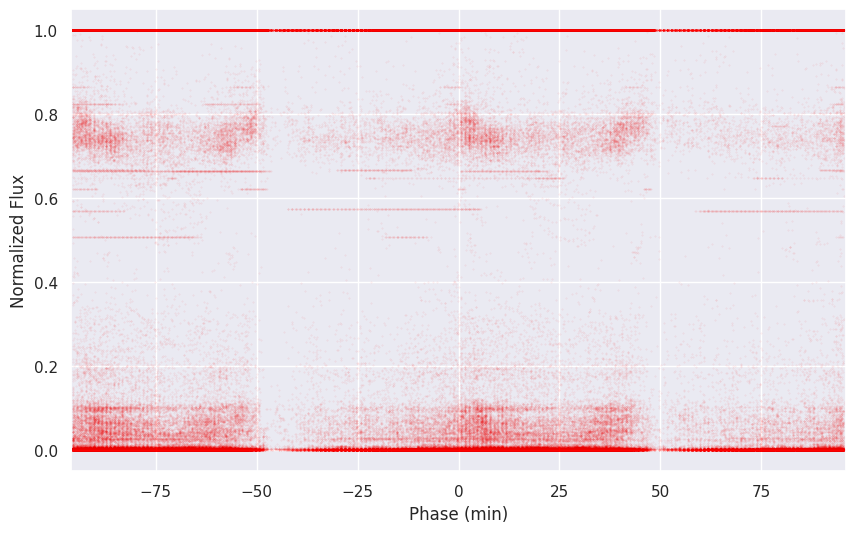

In [153]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Archivos de entrada
# archivo_linea = "output_95min.dat"
archivo_scatter = "phasefolding_periodicidad_191.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
# data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
# data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
# data_linea['x'] = data_linea['x'] - 158

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# plt.plot(data_linea['x'], data_linea['y'], label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.1, alpha=0.1)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
# plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-96,96)

# Añadir leyenda
# plt.legend()

# Mostrar la gráfica
#plt.savefig("images/phasefold_scater_2_periods_sample1.png", format='png', dpi=300)
plt.show()



# 4 Periodos

/tmp/ipykernel_21214/994616676.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_21214/994616676.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_21214/994616676.py:16: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


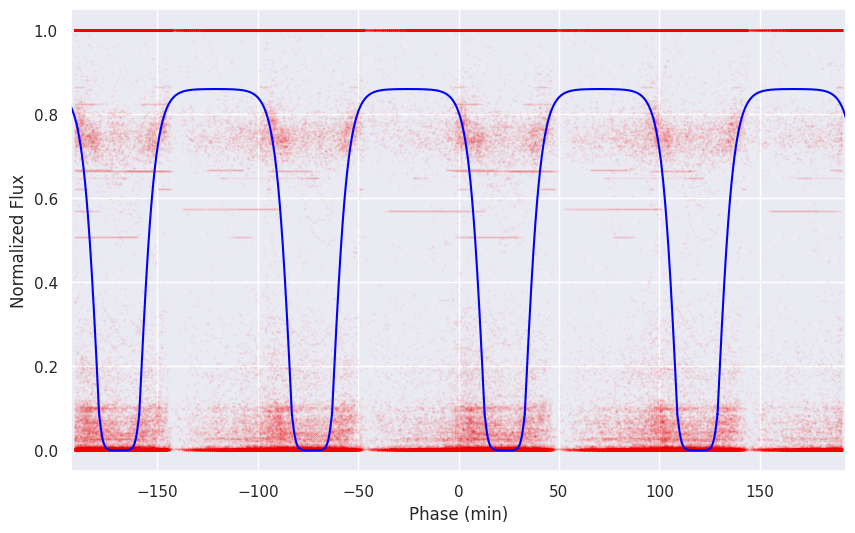

In [216]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Configuración de Seaborn
sns.set(style='darkgrid')

# Archivos de entrada
archivo_linea = "jacobi_0.86_E76.0_S20.0_m0.999_W10.0_desplazamiento10.0.dat"
# archivo_scatter = "phasefolding_periodicidad_191.dat"
archivo_scatter = "variacion_periodicidad/phasefolding_periodicidad_382.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] - 255

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# Insertamos NaN para crear discontinuidades entre tramos
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear una nueva lista para almacenar los datos con NaN para discontinuidad
x_discontinuo = []
y_discontinuo = []

for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN para interrumpir la conexión entre puntos
    if abs(x_vals[i + 1] - x_vals[i]) > 1:  # Aquí decidimos cuándo poner NaN, por ejemplo, si la diferencia es mayor a 1
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua (con NaN)
plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.1, alpha=.1)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
#plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-193,193)

# Añadir leyenda
#plt.legend()

# Mostrar la gráfica
plt.savefig("images/phasefold_jacobi_4_periods_sample1.png", format='png', dpi=300)

plt.show()


/tmp/ipykernel_839/2363686226.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_839/2363686226.py:12: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


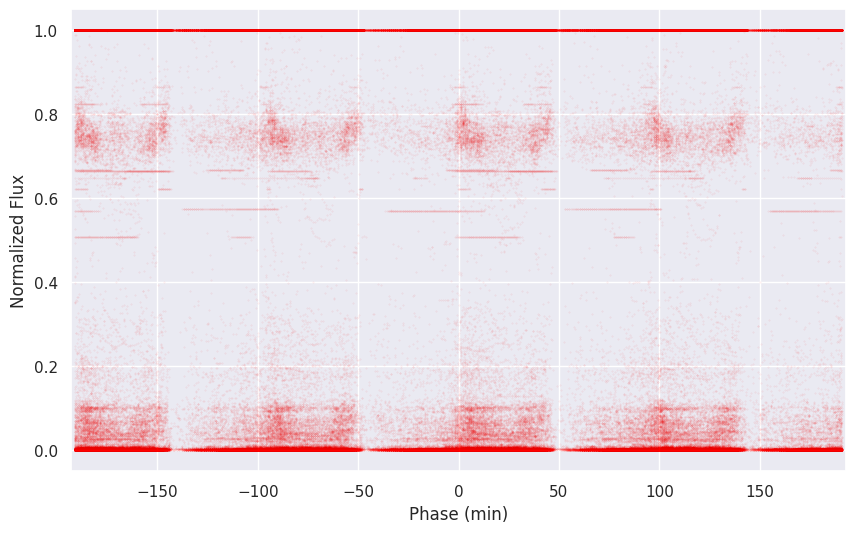

In [127]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Archivos de entrada
# archivo_linea = "output_95min.dat"
# archivo_scatter = "phasefolding_periodicidad_191.dat"
archivo_scatter = "variacion_periodicidad/phasefolding_periodicidad_382.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
# data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
# data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
# data_linea['x'] = data_linea['x'] - 158

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# plt.plot(data_linea['x'], data_linea['y'], label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.1, alpha=0.1)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
# plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-193,193)

# Añadir leyenda
# plt.legend()

# Mostrar la gráfica
plt.savefig("images/phasefold_scater_4_periods_sample1.png", format='png', dpi=300)
plt.show()



# 6 Periodos

/tmp/ipykernel_21214/2104942126.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_21214/2104942126.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_21214/2104942126.py:16: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


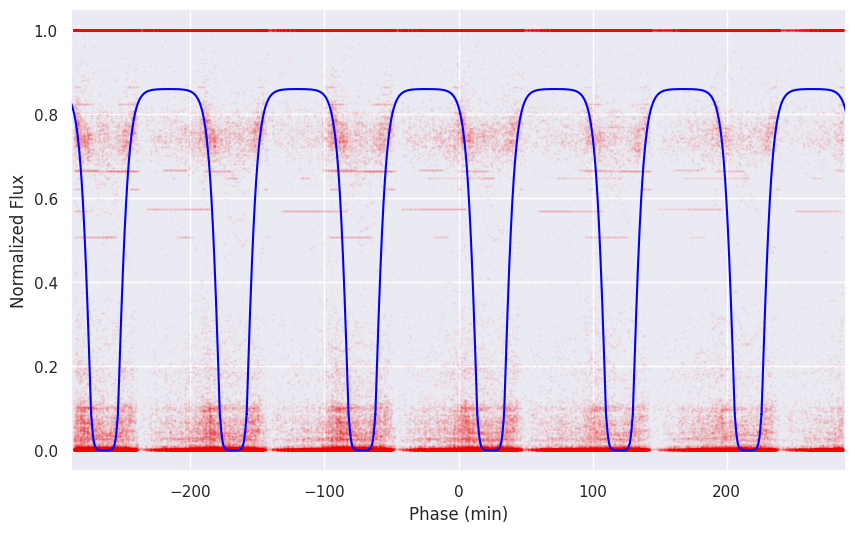

In [217]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Configuración de Seaborn
sns.set(style='darkgrid')

# Archivos de entrada
archivo_linea = "jacobi_0.86_E76.0_S20.0_m0.999_W10.0_desplazamiento10.0.dat"
# archivo_scatter = "phasefolding_periodicidad_191.dat"
archivo_scatter = "variacion_periodicidad/phasefolding_periodicidad_573.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] - 350

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# Insertamos NaN para crear discontinuidades entre tramos
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear una nueva lista para almacenar los datos con NaN para discontinuidad
x_discontinuo = []
y_discontinuo = []

for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN para interrumpir la conexión entre puntos
    if abs(x_vals[i + 1] - x_vals[i]) > 1:  # Aquí decidimos cuándo poner NaN, por ejemplo, si la diferencia es mayor a 1
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua (con NaN)
plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.1, alpha=.1)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
#plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-289,289)

# Añadir leyenda
#plt.legend()

# Mostrar la gráfica
#plt.savefig("images/phasefold_jacobi_6_periods_sample1.png", format='png', dpi=300)

plt.show()


/tmp/ipykernel_839/4253205112.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_839/4253205112.py:12: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


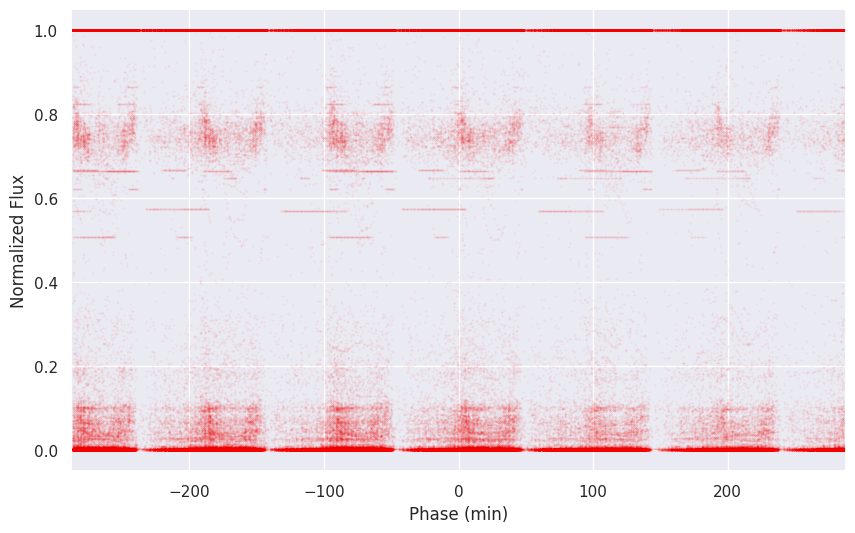

In [135]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Archivos de entrada
# archivo_linea = "output_95min.dat"
# archivo_scatter = "phasefolding_periodicidad_191.dat"
archivo_scatter = "variacion_periodicidad/phasefolding_periodicidad_573.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
# data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
# data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
# data_linea['x'] = data_linea['x'] - 158

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# plt.plot(data_linea['x'], data_linea['y'], label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=.1, alpha=0.1)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
# plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-288,288)

# Añadir leyenda
# plt.legend()

# Mostrar la gráfica
plt.savefig("images/phasefold_scater_6_periods_sample1.png", format='png', dpi=300)
plt.show()



# Facefolding sagA_570844801.dat

/tmp/ipykernel_3028/2862827084.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_3028/2862827084.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


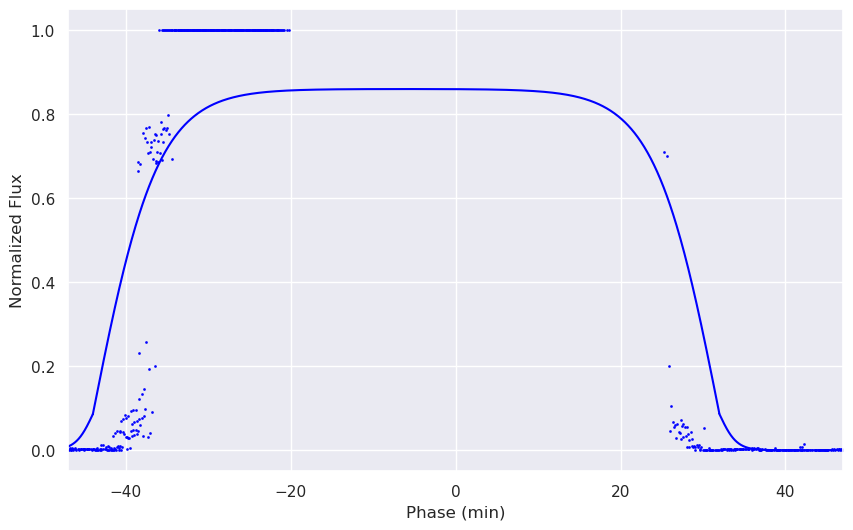

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Configuración de Seaborn
sns.set(style='darkgrid')

# Archivos de entrada
archivo_linea = "jacobi_0.86_E76.0_S20.0_m0.999_W10.0_desplazamiento10.0.dat"
# archivo_linea = "jacobi_0.86_E0.049_S0.017_m0.999_W10.0_desplazamiento10.0.dat"
archivo_scatter = "datos_phasefolding_sagA_570844801.dat.csv"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] - 236

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# Insertamos NaN para crear discontinuidades entre tramos
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear una nueva lista para almacenar los datos con NaN para discontinuidad
x_discontinuo = []
y_discontinuo = []

for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN para interrumpir la conexión entre puntos
    if abs(x_vals[i + 1] - x_vals[i]) > 1:  # Aquí decidimos cuándo poner NaN, por ejemplo, si la diferencia es mayor a 1
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua (con NaN)
plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='blue', s=1, alpha=.9)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
#plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-47, 47)

# Añadir leyenda
#plt.legend()

# Mostrar la gráfica
plt.savefig("images/phasefold_jacobi_sagA_570844801_sample1.png", format='png', dpi=300)

plt.show()


/tmp/ipykernel_3028/2742705174.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


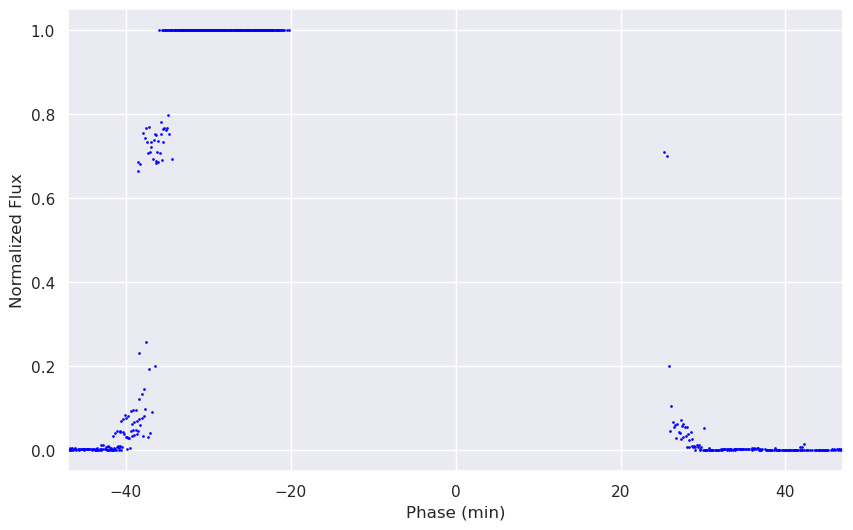

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Archivos de entrada
# archivo_linea = "output_95min.dat"
# archivo_scatter = "phasefolding_periodicidad_191.dat"
archivo_scatter = "datos_phasefolding_sagA_570844801.dat.csv"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
# data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
# data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
# data_linea['x'] = data_linea['x'] - 158

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# plt.plot(data_linea['x'], data_linea['y'], label="Jacobi Elliptical", color='blue', linestyle='-')

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='blue', s=1, alpha=0.9)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
# plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-47,47)

# Añadir leyenda
# plt.legend()

# Mostrar la gráfica
plt.savefig("images/phasefold_sagA_570844801_sample1.png", format='png', dpi=300)
plt.show()



# Light Curve sagA_570844801.dat

/tmp/ipykernel_8283/3894562862.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_8283/3894562862.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)


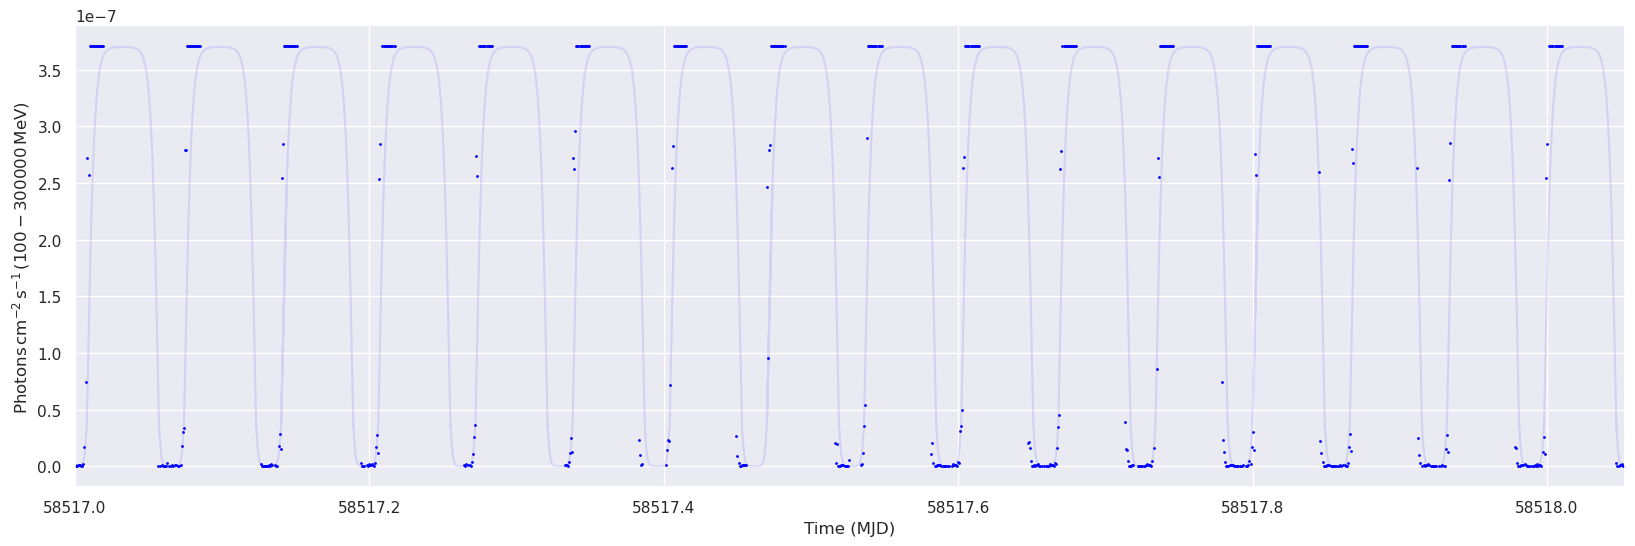

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Configuración de Seaborn
sns.set(style='darkgrid')

# Archivos de entrada
archivo_linea = "jacobi_3.7e-07_E0.049_S0.017_m0.999_W20.0_desplazamiento10.0_sort.dat"
archivo_scatter = "sagA_570844801.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] + 58516.81

# Crear la figura y el eje
# plt.figure(figsize=(6.3, 3))
plt.figure(figsize=(20, 6))

# Graficar la línea (con desplazamiento)
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear listas para datos discontinúos
x_discontinuo = []
y_discontinuo = []

# Insertar NaN para crear discontinuidades
for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN si la diferencia es mayor a 1
    if abs(x_vals[i + 1] - x_vals[i]) > 1:
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua
plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-', alpha=.1)

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='blue', s=1)

# Etiquetas y título
plt.xlabel("Time (MJD)")
plt.ylabel('$\mathrm{Photons \, cm^{-2} \, s^{-1} \, (100-300000 \,  MeV)}$')

# Configurar el eje x para evitar notación científica
ax = plt.gca()  # Obtener el eje actual
ax.ticklabel_format(style='plain', axis='x')  # Desactivar notación científica en el eje x
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # Mostrar valores completos
ax.xaxis.set_minor_formatter(ScalarFormatter(useOffset=False))  # Formato también para menores ticks

# Ajustar los límites del eje x si es necesario (opcional)
plt.xlim(58517, 58518.053)

# Añadir leyenda
#plt.legend()

plt.savefig("images/lightcurve_jacobi_sagA_570844801_sample1.pdf", bbox_inches="tight", format='pdf', dpi=300)
# Mostrar la gráfica
plt.show()


/tmp/ipykernel_3028/1190663888.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_3028/1190663888.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)


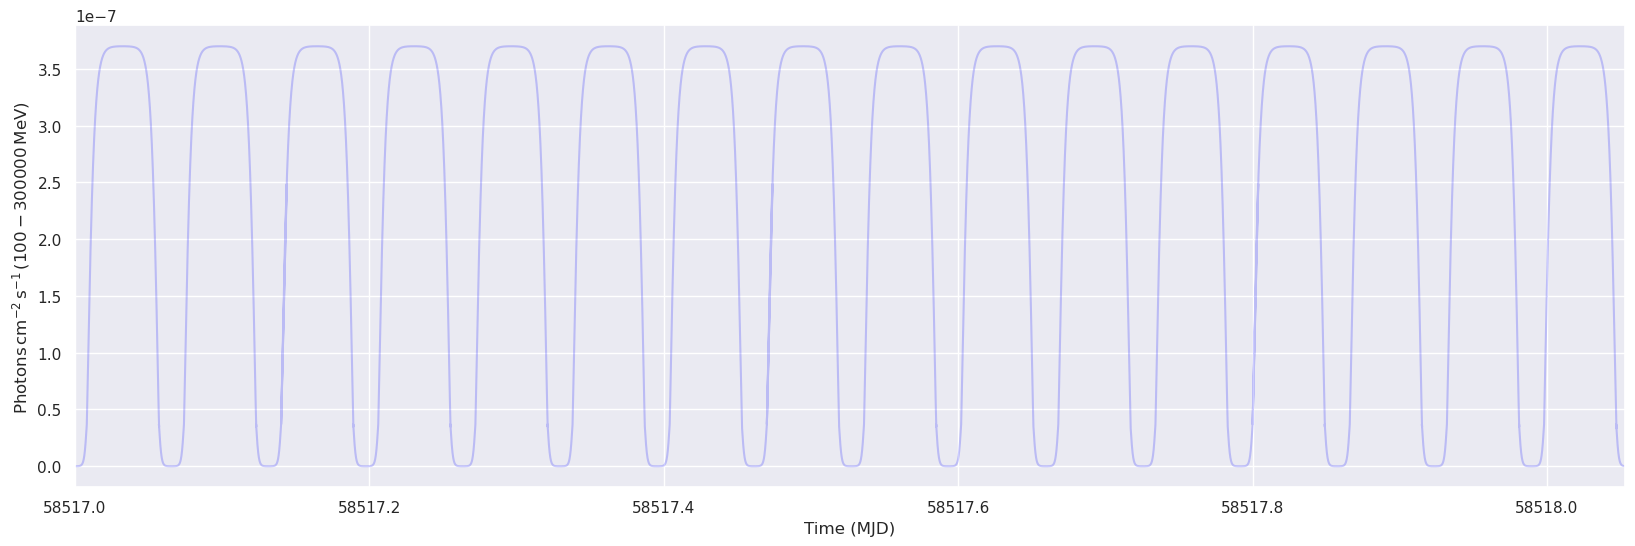

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Configuración de Seaborn
sns.set(style='darkgrid')

# Archivos de entrada
archivo_linea = "jacobi_3.7e-07_E0.049_S0.017_m0.999_W20.0_desplazamiento10.0_sort.dat"
archivo_scatter = "sagA_570844801.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] + 58516.81

# Crear la figura y el eje
# plt.figure(figsize=(6.3, 3))
plt.figure(figsize=(20, 6))

# Graficar la línea (con desplazamiento)
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear listas para datos discontinúos
x_discontinuo = []
y_discontinuo = []

# Insertar NaN para crear discontinuidades
for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN si la diferencia es mayor a 1
    if abs(x_vals[i + 1] - x_vals[i]) > 1:
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua
plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-', alpha=.2)

# Graficar el scatter
#plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=0.1)

# Etiquetas y título
plt.xlabel("Time (MJD)")
plt.ylabel('$\mathrm{Photons \, cm^{-2} \, s^{-1} \, (100-300000 \,  MeV)}$')

# Configurar el eje x para evitar notación científica
ax = plt.gca()  # Obtener el eje actual
ax.ticklabel_format(style='plain', axis='x')  # Desactivar notación científica en el eje x
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # Mostrar valores completos
ax.xaxis.set_minor_formatter(ScalarFormatter(useOffset=False))  # Formato también para menores ticksa
#ax.set_xticks([])  # Elimina todos los ticks en el eje x


# Ajustar los límites del eje x si es necesario (opcional)
plt.xlim(58517, 58518.053)

# Añadir leyenda
#plt.legend()

plt.savefig("images/lightcurve_jacobi_alone_sample1.png", format='png', dpi=300)
# Mostrar la gráfica
plt.show()



/tmp/ipykernel_3028/3440386950.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_3028/3440386950.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)


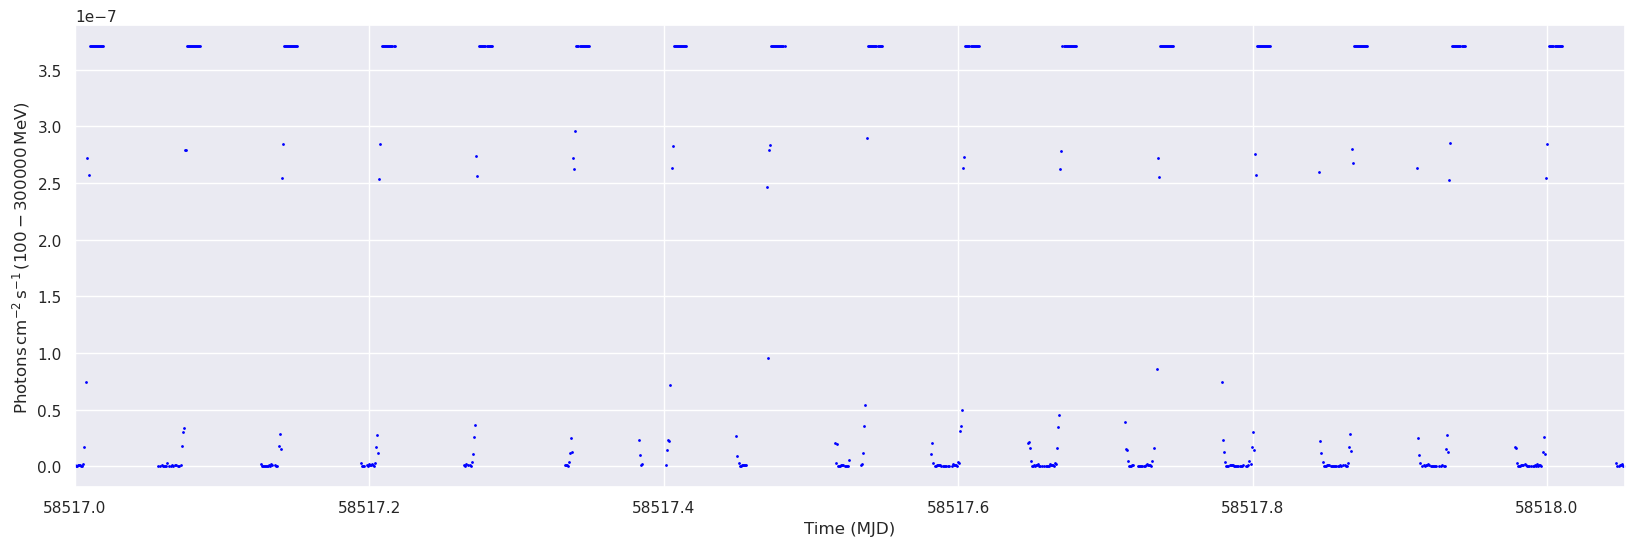

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Configuración de Seaborn
sns.set(style='darkgrid')

# Archivos de entrada
archivo_linea = "jacobi_3.7e-07_E0.049_S0.017_m0.999_W20.0_desplazamiento10.0_sort.dat"
archivo_scatter = "sagA_570844801.dat"


# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] + 58516.81

# Crear la figura y el eje
plt.figure(figsize=(20, 6))
# plt.figure(figsize=(6.3, 3))

# ---- Datos para la línea ----
x_vals_linea = data_linea['x'].values
y_vals_linea = data_linea['y'].values

# Ajustar el umbral para filtrar las variaciones pequeñas en 'y'
umbral = 1e-8  # Umbral para evitar líneas horizontales indeseadas

# Filtrar las diferencias pequeñas
diferencias = np.abs(np.diff(y_vals_linea))
indices_validos = np.where(diferencias > umbral)[0]  # Solo tomamos los puntos con diferencias mayores al umbral

# Graficar la línea filtrada
#plt.plot(x_vals_linea[indices_validos], y_vals_linea[indices_validos], color='blue', linestyle='-', alpha=0.2)

# ---- Graficar el scatter sin cambios ----
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='blue', s=1)

# Etiquetas y título
plt.xlabel("Time (MJD)")
plt.ylabel('$\mathrm{Photons \, cm^{-2} \, s^{-1} \, (100-300000 \,  MeV)}$')

# Configurar el eje x para evitar notación científica
ax = plt.gca()  # Obtener el eje actual
ax.ticklabel_format(style='plain', axis='x')  # Desactivar notación científica en el eje x
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # Mostrar valores completos
ax.xaxis.set_minor_formatter(ScalarFormatter(useOffset=False))  # Formato también para menores ticks
# ax.set_xticks([])  # Elimina todos los ticks en el eje x

# Ajustar los límites del eje x si es necesario (opcional)
plt.xlim(58517, 58518.053)
# Añadir leyenda
# plt.legend()

plt.savefig("images/lightcurve_sagA_570844801_sample1.png", format='png', dpi=300)
# Mostrar la gráfica
plt.show()


/tmp/ipykernel_3028/821568529.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_3028/821568529.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)


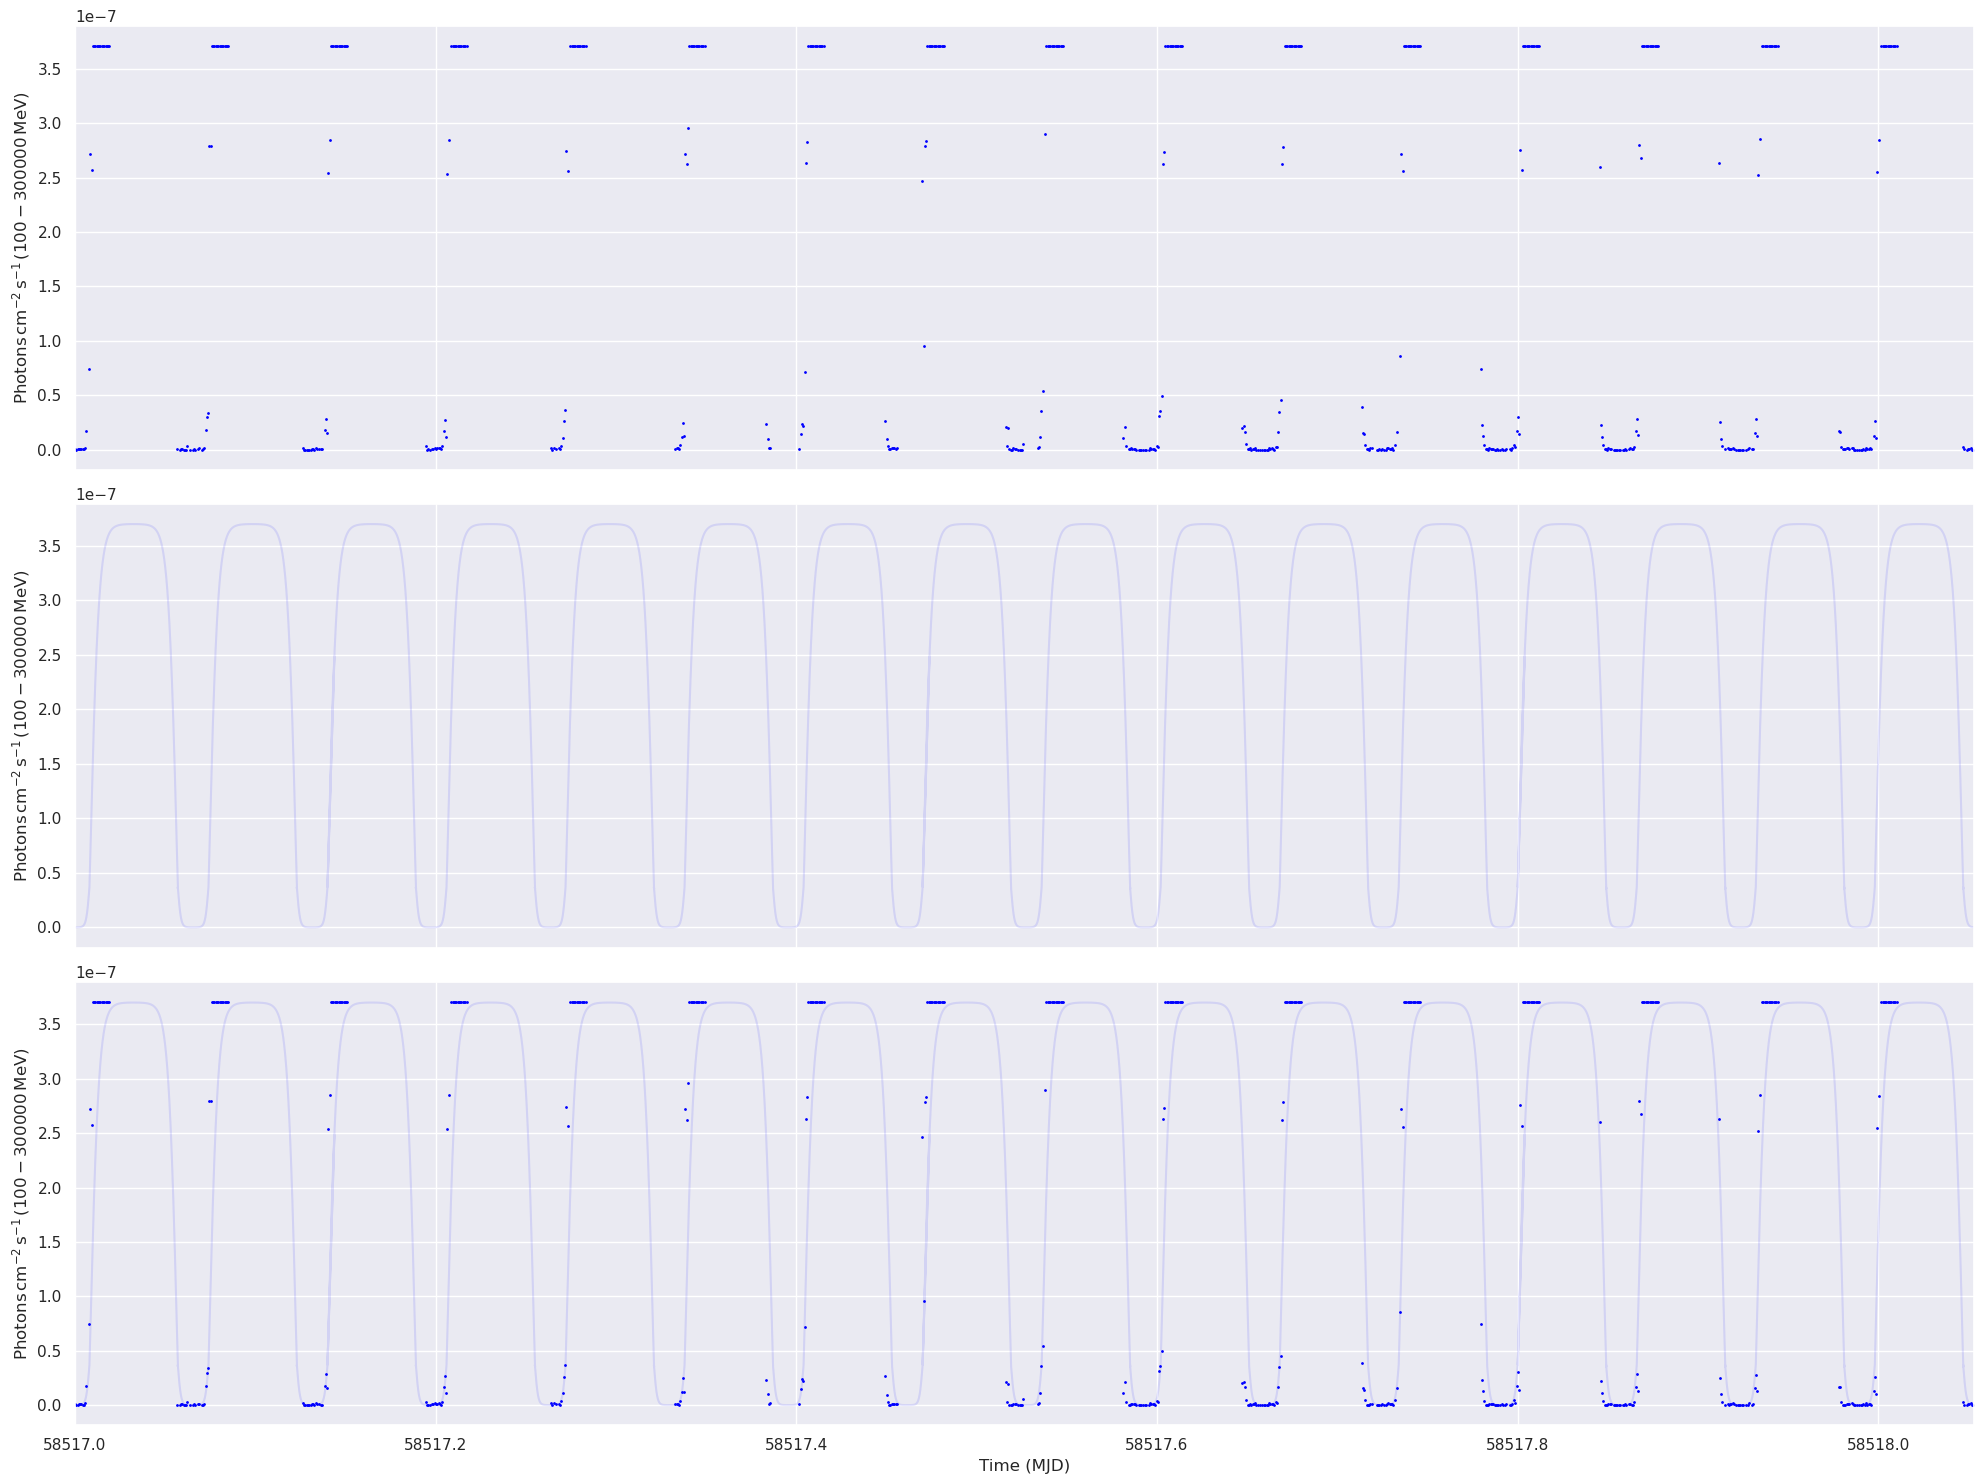

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Configuración de Seaborn
sns.set(style='darkgrid')

# Archivos de entrada
archivo_linea = "jacobi_3.7e-07_E0.049_S0.017_m0.999_W20.0_desplazamiento10.0_sort.dat"
archivo_scatter = "sagA_570844801.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] + 58516.81

# Crear la figura y los ejes para 3 subgráficas
fig, axes = plt.subplots(3, 1, figsize=(20, 15), sharex=True)

# Graficar la línea (con desplazamiento) en la primera subgráfica
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear listas para datos discontinúos
x_discontinuo = []
y_discontinuo = []

# Insertar NaN para crear discontinuidades
for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN si la diferencia es mayor a 1
    if abs(x_vals[i + 1] - x_vals[i]) > 1:
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])


# Graficar el scatter en la segunda subgráfica
axes[0].scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='blue', s=1)
axes[0].set_ylabel('$\mathrm{Photons \, cm^{-2} \, s^{-1} \, (100-300000 \,  MeV)}$')
#axes[1].set_title('Scatter Plot: Phasefold')
axes[0].ticklabel_format(style='plain', axis='x')  # Desactivar notación científica en el eje x
axes[0].xaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # Mostrar valores completos
axes[0].xaxis.set_minor_formatter(ScalarFormatter(useOffset=False))  # Formato también para menores ticks

# Graficar la línea discontinua en el primer subplot
axes[1].plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-', alpha=.1)
axes[1].set_ylabel('$\mathrm{Photons \, cm^{-2} \, s^{-1} \, (100-300000 \,  MeV)}$')
#axes[0].set_title('Line Plot: Jacobi Elliptical')
axes[1].ticklabel_format(style='plain', axis='x')  # Desactivar notación científica en el eje x
axes[1].xaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # Mostrar valores completos
axes[1].xaxis.set_minor_formatter(ScalarFormatter(useOffset=False))  # Formato también para menores ticks

# Graficar tanto el scatter como la línea en la tercera subgráfica
axes[2].plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-', alpha=.1)
axes[2].scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='blue', s=1)
axes[2].set_xlabel("Time (MJD)")
axes[2].set_ylabel('$\mathrm{Photons \, cm^{-2} \, s^{-1} \, (100-300000 \,  MeV)}$')
#axes[2].set_title('Combined Plot: Jacobi Elliptical + Phasefold')
axes[2].ticklabel_format(style='plain', axis='x')  # Desactivar notación científica en el eje x
axes[2].xaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # Mostrar valores completos
axes[2].xaxis.set_minor_formatter(ScalarFormatter(useOffset=False))  # Formato también para menores ticks

# Ajustar los límites del eje x para todas las subgráficas
axes[2].set_xlim(58517, 58518.053)
# plt.subplots_adjust(top=0.0)  # Ajusta 'top' para recortar la parte superio
# Añadir leyenda
#axes[0].legend()
#axes[1].legend()
#axes[2].legend()

# Guardar la figura
plt.tight_layout()
plt.savefig("images/lightcurve_jacobi_sagA_570844801_combined_plots.png", format='png', dpi=300)

# Mostrar la gráfica
plt.show()


# Graficos para NATURE

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


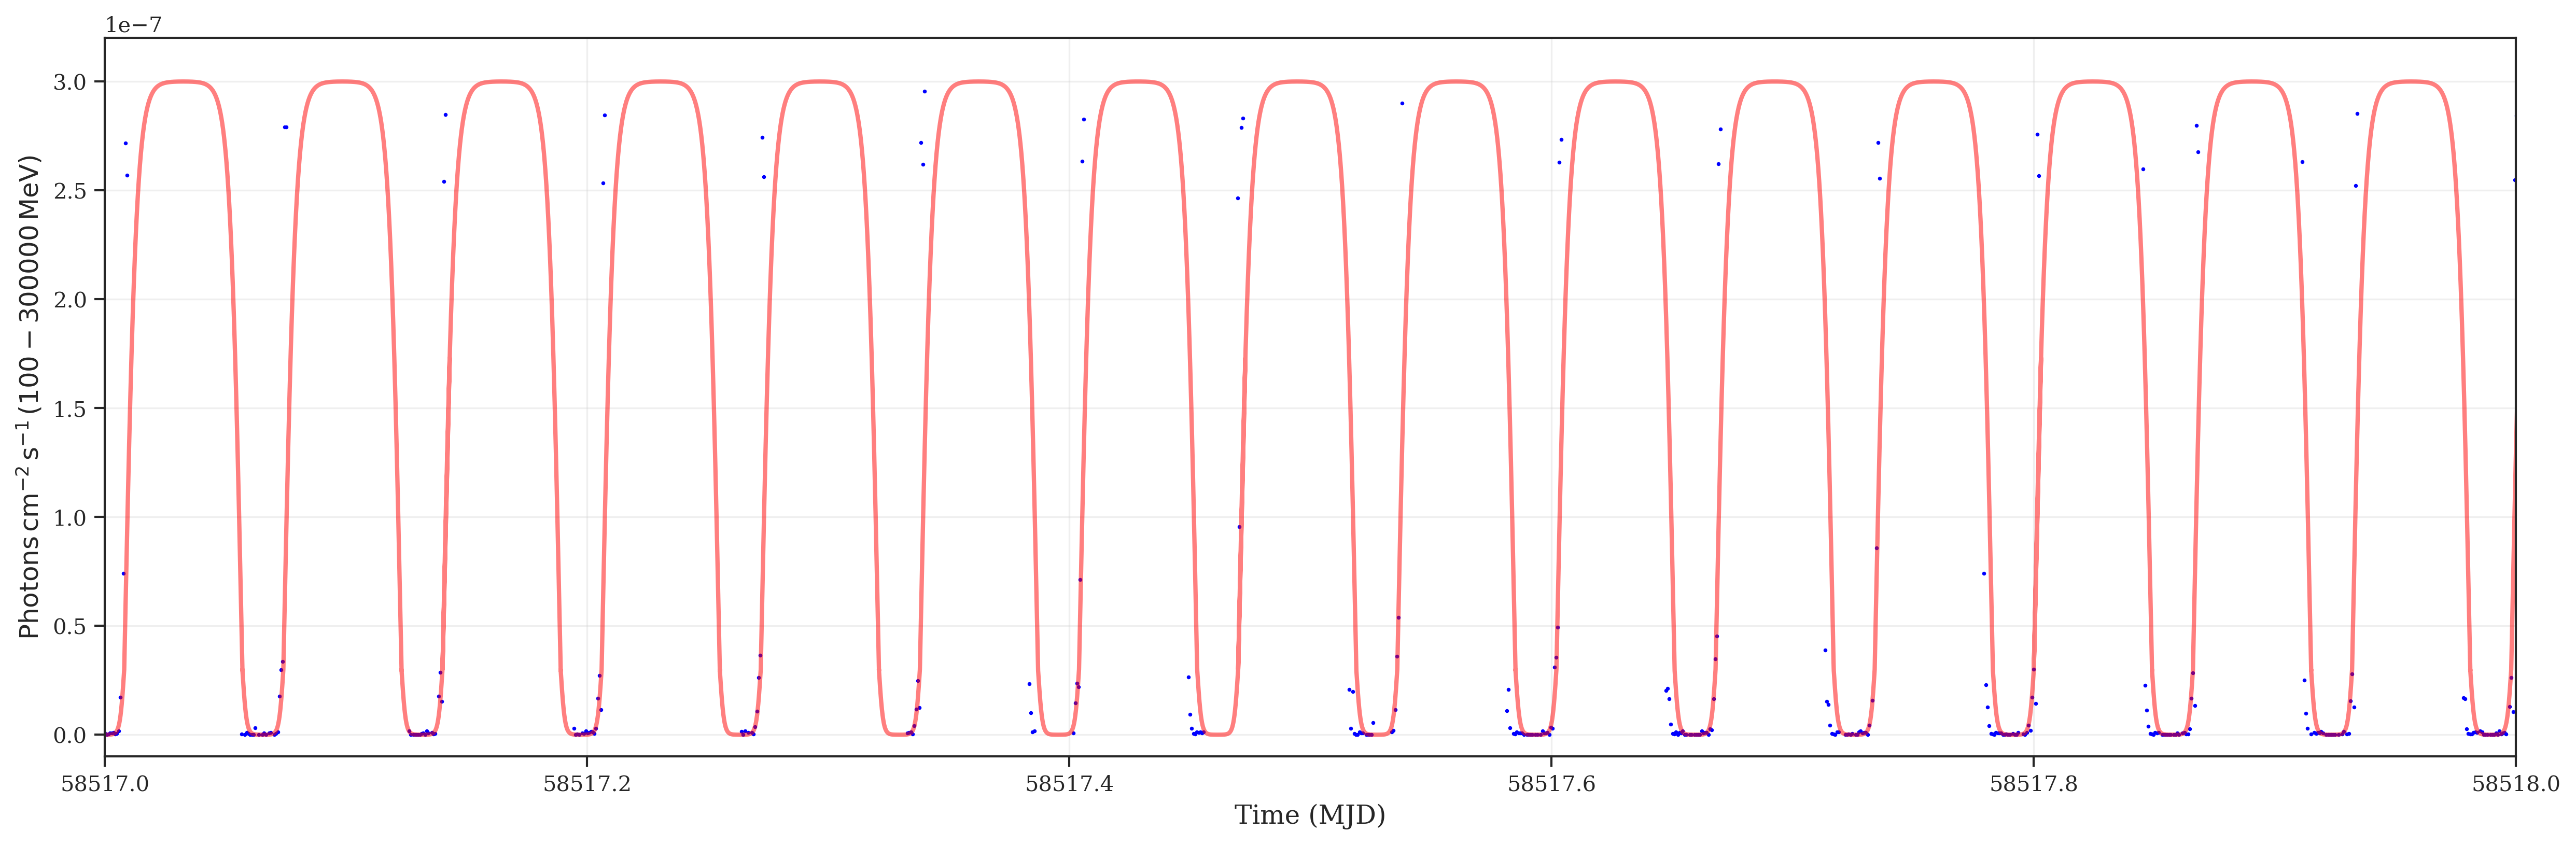

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Configuración avanzada de Seaborn y Matplotlib
sns.set_context("paper", font_scale=1.5)  # Ajuste de tamaño de fuente para publicaciones
sns.set_style("ticks")  # Estilo limpio con ticks visibles
sns.set_palette("muted")  # Paleta de colores suave y profesional

# Configuración adicional de Matplotlib
plt.rcParams.update({
    "axes.titlesize": 14,      # Tamaño de los títulos de los ejes
    "axes.labelsize": 12,      # Tamaño de las etiquetas de los ejes
    "xtick.labelsize": 10,     # Tamaño de las etiquetas del eje X
    "ytick.labelsize": 10,     # Tamaño de las etiquetas del eje Y
    "legend.fontsize": 10,     # Tamaño de la leyenda
    "font.family": "serif",    # Tipo de fuente: preferido en publicaciones científicas
    "figure.dpi": 300,         # Resolución de la figura
    "savefig.dpi": 300,        # Resolución de exportación
    "figure.figsize": (20, 6), # Tamaño de la figura (ajustado)
    "axes.grid": True,         # Activar cuadrícula
    "grid.alpha": 0.3,         # Transparencia de la cuadrícula
    "lines.linewidth": 2,      # Grosor de las líneas
})

# Archivos de entrada
#archivo_linea = "jacobi_3.7e-07_E0.049_S0.017_m0.999_W20.0_desplazamiento10.0_sort.dat"
archivo_linea = "jacobi_3e-07_E0.049_S0.017_m0.999_W20.0_desplazamiento10.0_sort.dat"
archivo_scatter = "sagA_570844801.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] + 58516.81

# Crear la figura y el eje
plt.figure(figsize=(20, 6))

# Graficar la línea (con desplazamiento)
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear listas para datos discontinúos
x_discontinuo = []
y_discontinuo = []

# Insertar NaN para crear discontinuidades
for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN si la diferencia es mayor a 1
    if abs(x_vals[i + 1] - x_vals[i]) > 1:
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua
#plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-', alpha=.1)
plt.plot(x_discontinuo, y_discontinuo, color='red', linestyle='-', alpha=.5)

# Graficar el scatter
#plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='blue', s=1)
plt.scatter(data_scatter['x'], data_scatter['y'],  color='blue', s=1)

# Etiquetas y título
plt.xlabel("Time (MJD)")
plt.ylabel('$\mathrm{Photons \, cm^{-2} \, s^{-1} \, (100-300000 \,  MeV)}$')

# Configurar el eje x para evitar notación científica
ax = plt.gca()  # Obtener el eje actual
ax.ticklabel_format(style='plain', axis='x')  # Desactivar notación científica en el eje x
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # Mostrar valores completos
ax.xaxis.set_minor_formatter(ScalarFormatter(useOffset=False))  # Formato también para menores ticks

# Ajustar los límites del eje x si es necesario (opcional)
plt.xlim(58517, 58518.0)
plt.ylim(-0.1e-07,3.2e-07)

# Añadir leyenda
plt.legend(loc="upper right", frameon=False, fontsize=12)  # Leyenda más profesional

# Guardar la figura en alta calidad
plt.savefig("images/lightcurve_jacobi_sagA_570844801_sample1.pdf", bbox_inches="tight", format='pdf', dpi=300)

# Mostrar la gráfica
plt.show()


/tmp/ipykernel_8283/1200857227.py:34: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_8283/1200857227.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an undersc

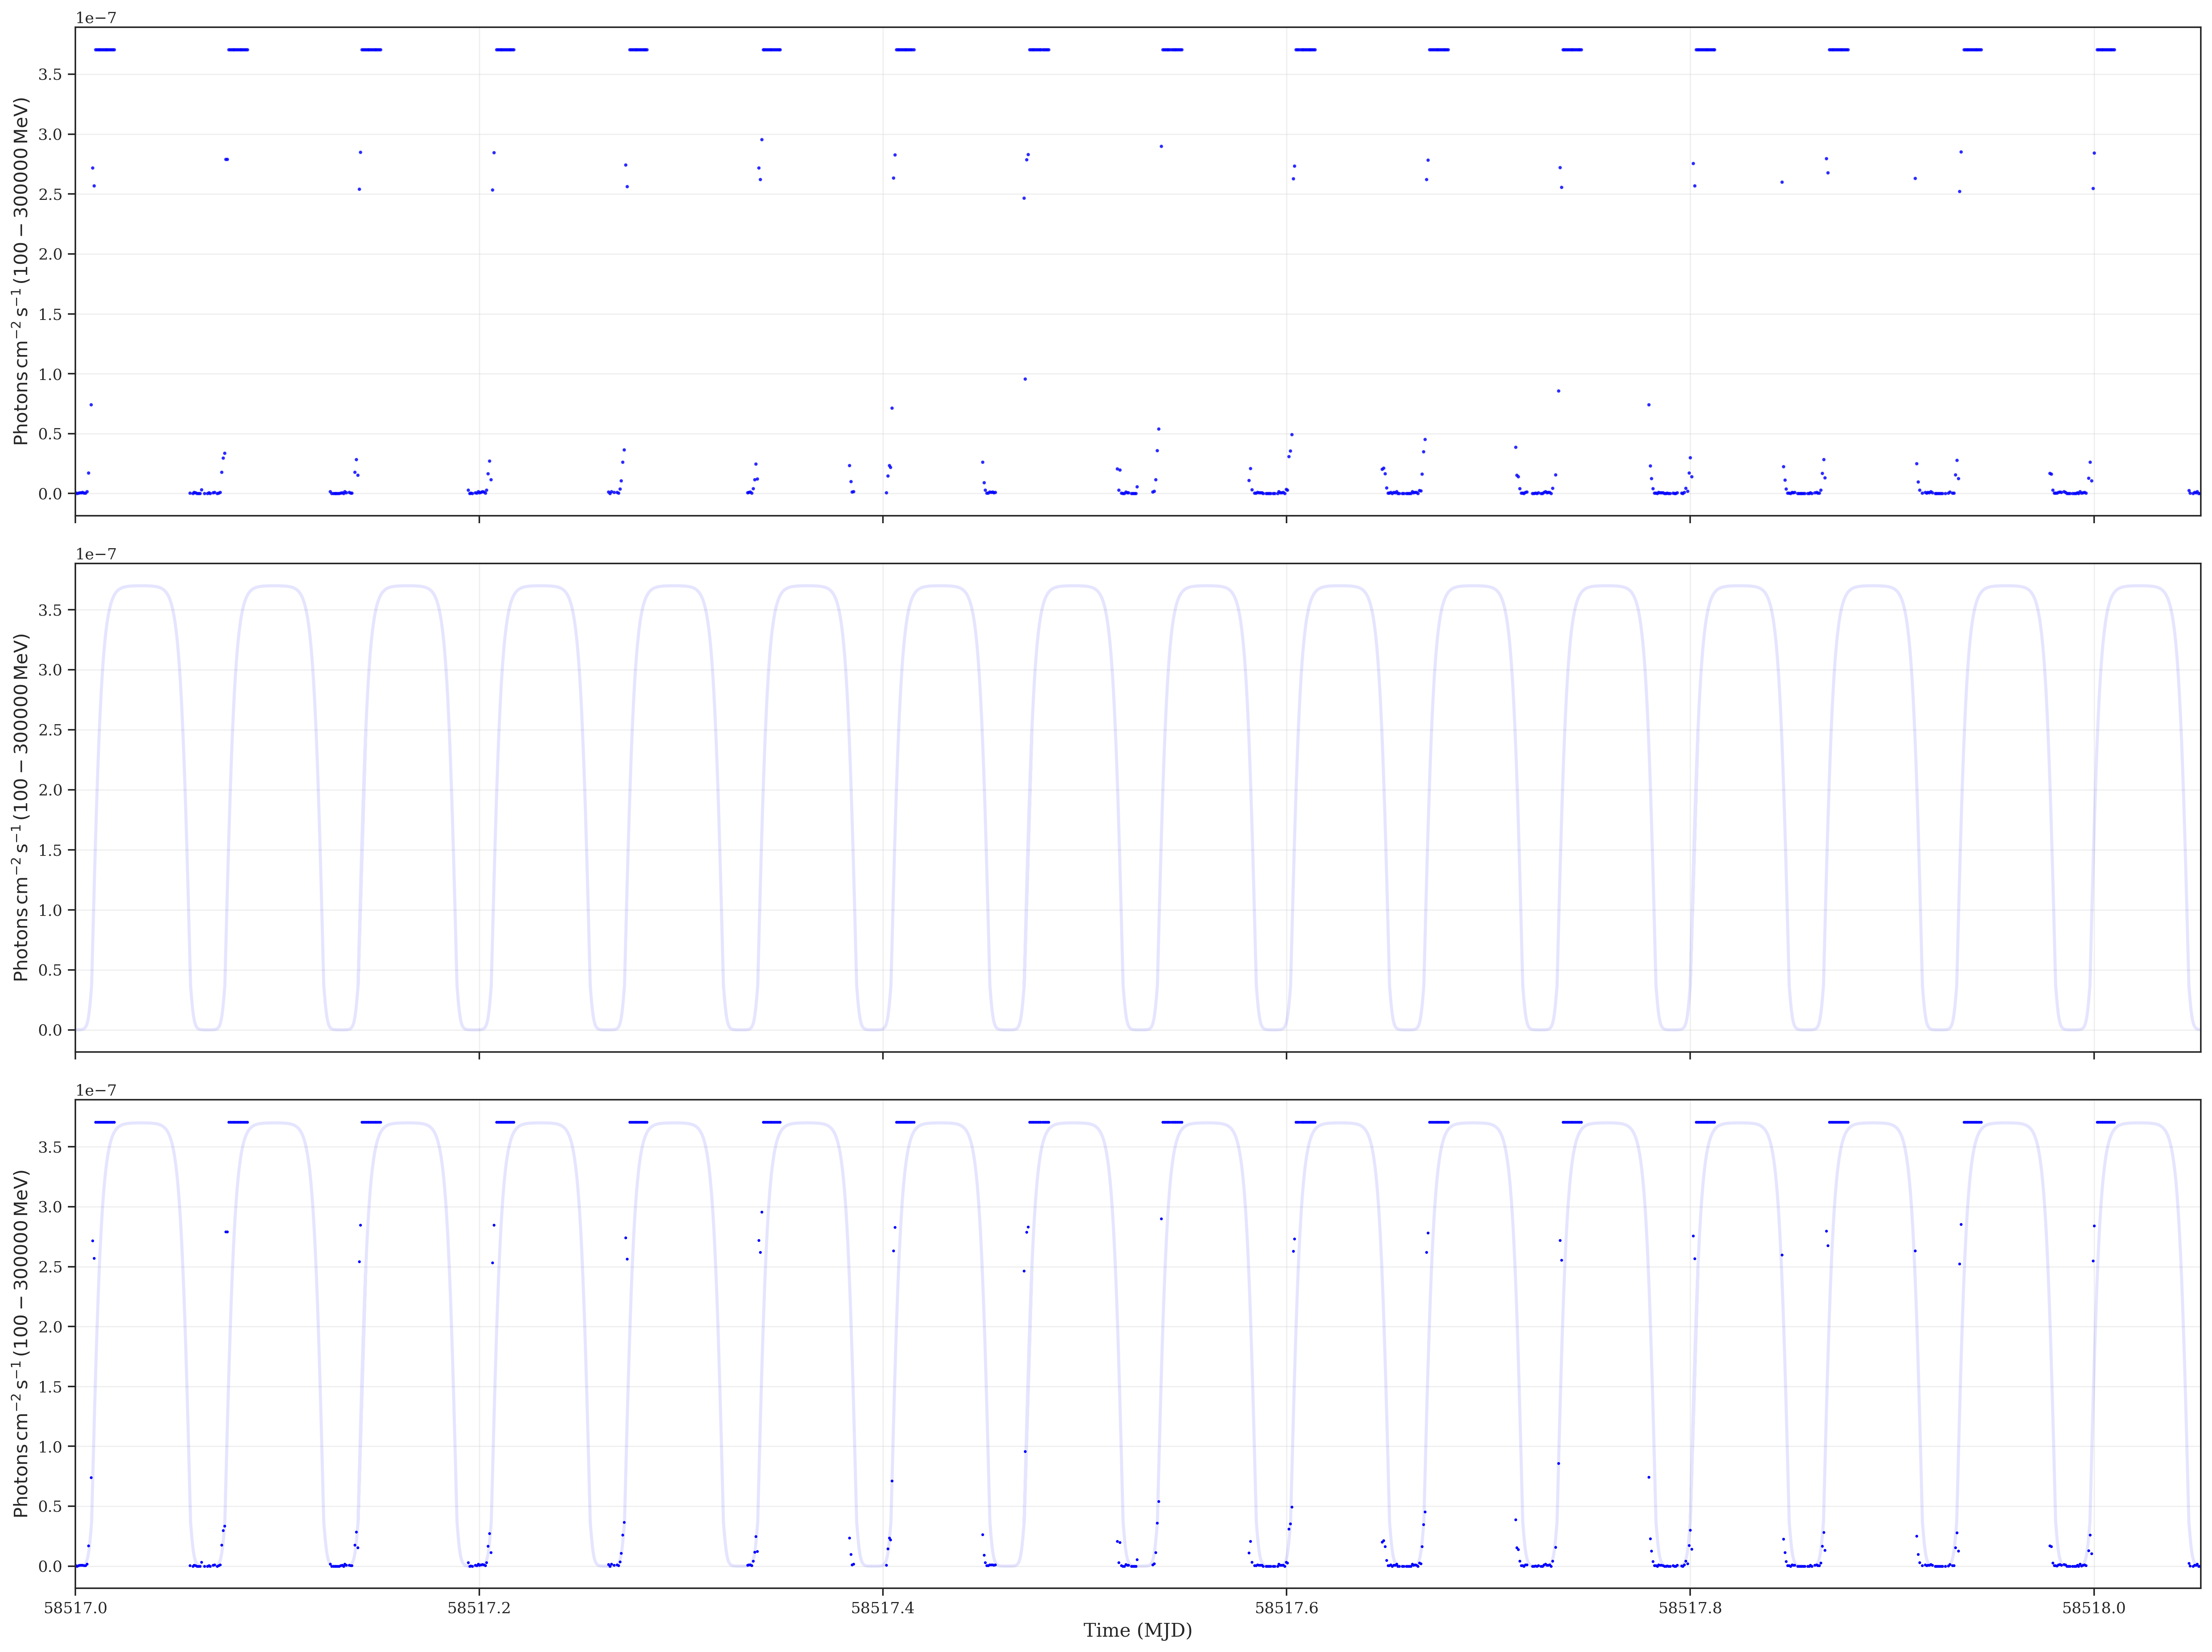

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import ScalarFormatter


# Configuración avanzada de Seaborn y Matplotlib
sns.set_context("paper", font_scale=1.5)  # Ajuste de tamaño de fuente para publicaciones
sns.set_style("ticks")  # Estilo limpio con ticks visibles
sns.set_palette("muted")  # Paleta de colores suave y profesional

# Configuración adicional de Matplotlib
plt.rcParams.update({
    "axes.titlesize": 14,      # Tamaño de los títulos de los ejes
    "axes.labelsize": 12,      # Tamaño de las etiquetas de los ejes
    "xtick.labelsize": 10,     # Tamaño de las etiquetas del eje X
    "ytick.labelsize": 10,     # Tamaño de las etiquetas del eje Y
    "legend.fontsize": 10,     # Tamaño de la leyenda
    "font.family": "serif",    # Tipo de fuente: preferido en publicaciones científicas
    "figure.dpi": 300,         # Resolución de la figura
    "savefig.dpi": 300,        # Resolución de exportación
    "figure.figsize": (20, 6), # Tamaño de la figura (ajustado)
    "axes.grid": True,         # Activar cuadrícula
    "grid.alpha": 0.3,         # Transparencia de la cuadrícula
    "lines.linewidth": 2,      # Grosor de las líneas
})

# Archivos de entrada
archivo_linea = "jacobi_3.7e-07_E0.049_S0.017_m0.999_W20.0_desplazamiento10.0_sort.dat"
archivo_scatter = "sagA_570844801.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] + 58516.81

# Crear la figura y los ejes para 3 subgráficas
fig, axes = plt.subplots(3, 1, figsize=(20, 15), sharex=True)

# Graficar la línea (con desplazamiento) en la primera subgráfica
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear listas para datos discontinuos
x_discontinuo = []
y_discontinuo = []

# Insertar NaN para crear discontinuidades
for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN si la diferencia es mayor a 1
    if abs(x_vals[i + 1] - x_vals[i]) > 1:
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar el scatter en la primera subgráfica
#axes[0].scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='blue', s=2, alpha=0.7)
axes[0].scatter(data_scatter['x'], data_scatter['y'], color='blue', s=2, alpha=0.7)
axes[0].set_ylabel('$\mathrm{Photons \, cm^{-2} \, s^{-1} \, (100-300000 \,  MeV)}$')
axes[0].ticklabel_format(style='plain', axis='x')  # Desactivar notación científica en el eje x
axes[0].xaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # Mostrar valores completos
axes[0].xaxis.set_minor_formatter(ScalarFormatter(useOffset=False))  # Formato también para menores ticks
#axes[0].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')  # Grilla más fina

# Graficar la línea discontinua en la segunda subgráfica
#axes[1].plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-', alpha=.5, linewidth=2)
axes[1].plot(x_discontinuo, y_discontinuo, color='blue', linestyle='-', alpha=.1, linewidth=2)
axes[1].set_ylabel('$\mathrm{Photons \, cm^{-2} \, s^{-1} \, (100-300000 \,  MeV)}$')
axes[1].ticklabel_format(style='plain', axis='x')  # Desactivar notación científica en el eje x
axes[1].xaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # Mostrar valores completos
axes[1].xaxis.set_minor_formatter(ScalarFormatter(useOffset=False))  # Formato también para menores ticks
#axes[1].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')  # Grilla más fina

# Graficar tanto el scatter como la línea en la tercera subgráfica
#axes[2].plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-', alpha=.5, linewidth=2)
axes[2].plot(x_discontinuo, y_discontinuo,  color='blue', linestyle='-', alpha=.1, linewidth=2)
#axes[2].scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=10, alpha=0.7)
axes[2].scatter(data_scatter['x'], data_scatter['y'], color='blue', s=1)
axes[2].set_xlabel("Time (MJD)")
axes[2].set_ylabel('$\mathrm{Photons \, cm^{-2} \, s^{-1} \, (100-300000 \,  MeV)}$')
axes[2].ticklabel_format(style='plain', axis='x')  # Desactivar notación científica en el eje x
axes[2].xaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # Mostrar valores completos
axes[2].xaxis.set_minor_formatter(ScalarFormatter(useOffset=False))  # Formato también para menores ticks
#axes[2].grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')  # Grilla más fina

# Ajustar los límites del eje x para todas las subgráficas
axes[2].set_xlim(58517, 58518.053)

# Añadir leyenda en la esquina superior izquierda
axes[0].legend(loc='upper left', fontsize=12)
axes[1].legend(loc='upper left', fontsize=12)
axes[2].legend(loc='upper left', fontsize=12)

# Ajuste de los márgenes para mejor distribución
plt.tight_layout()

# Guardar la figura como PDF
plt.savefig("images/lightcurve_jacobi_sagA_570844801_combined_plots.pdf", format='pdf', bbox_inches="tight", dpi=300)

# Mostrar la gráfica
plt.show()


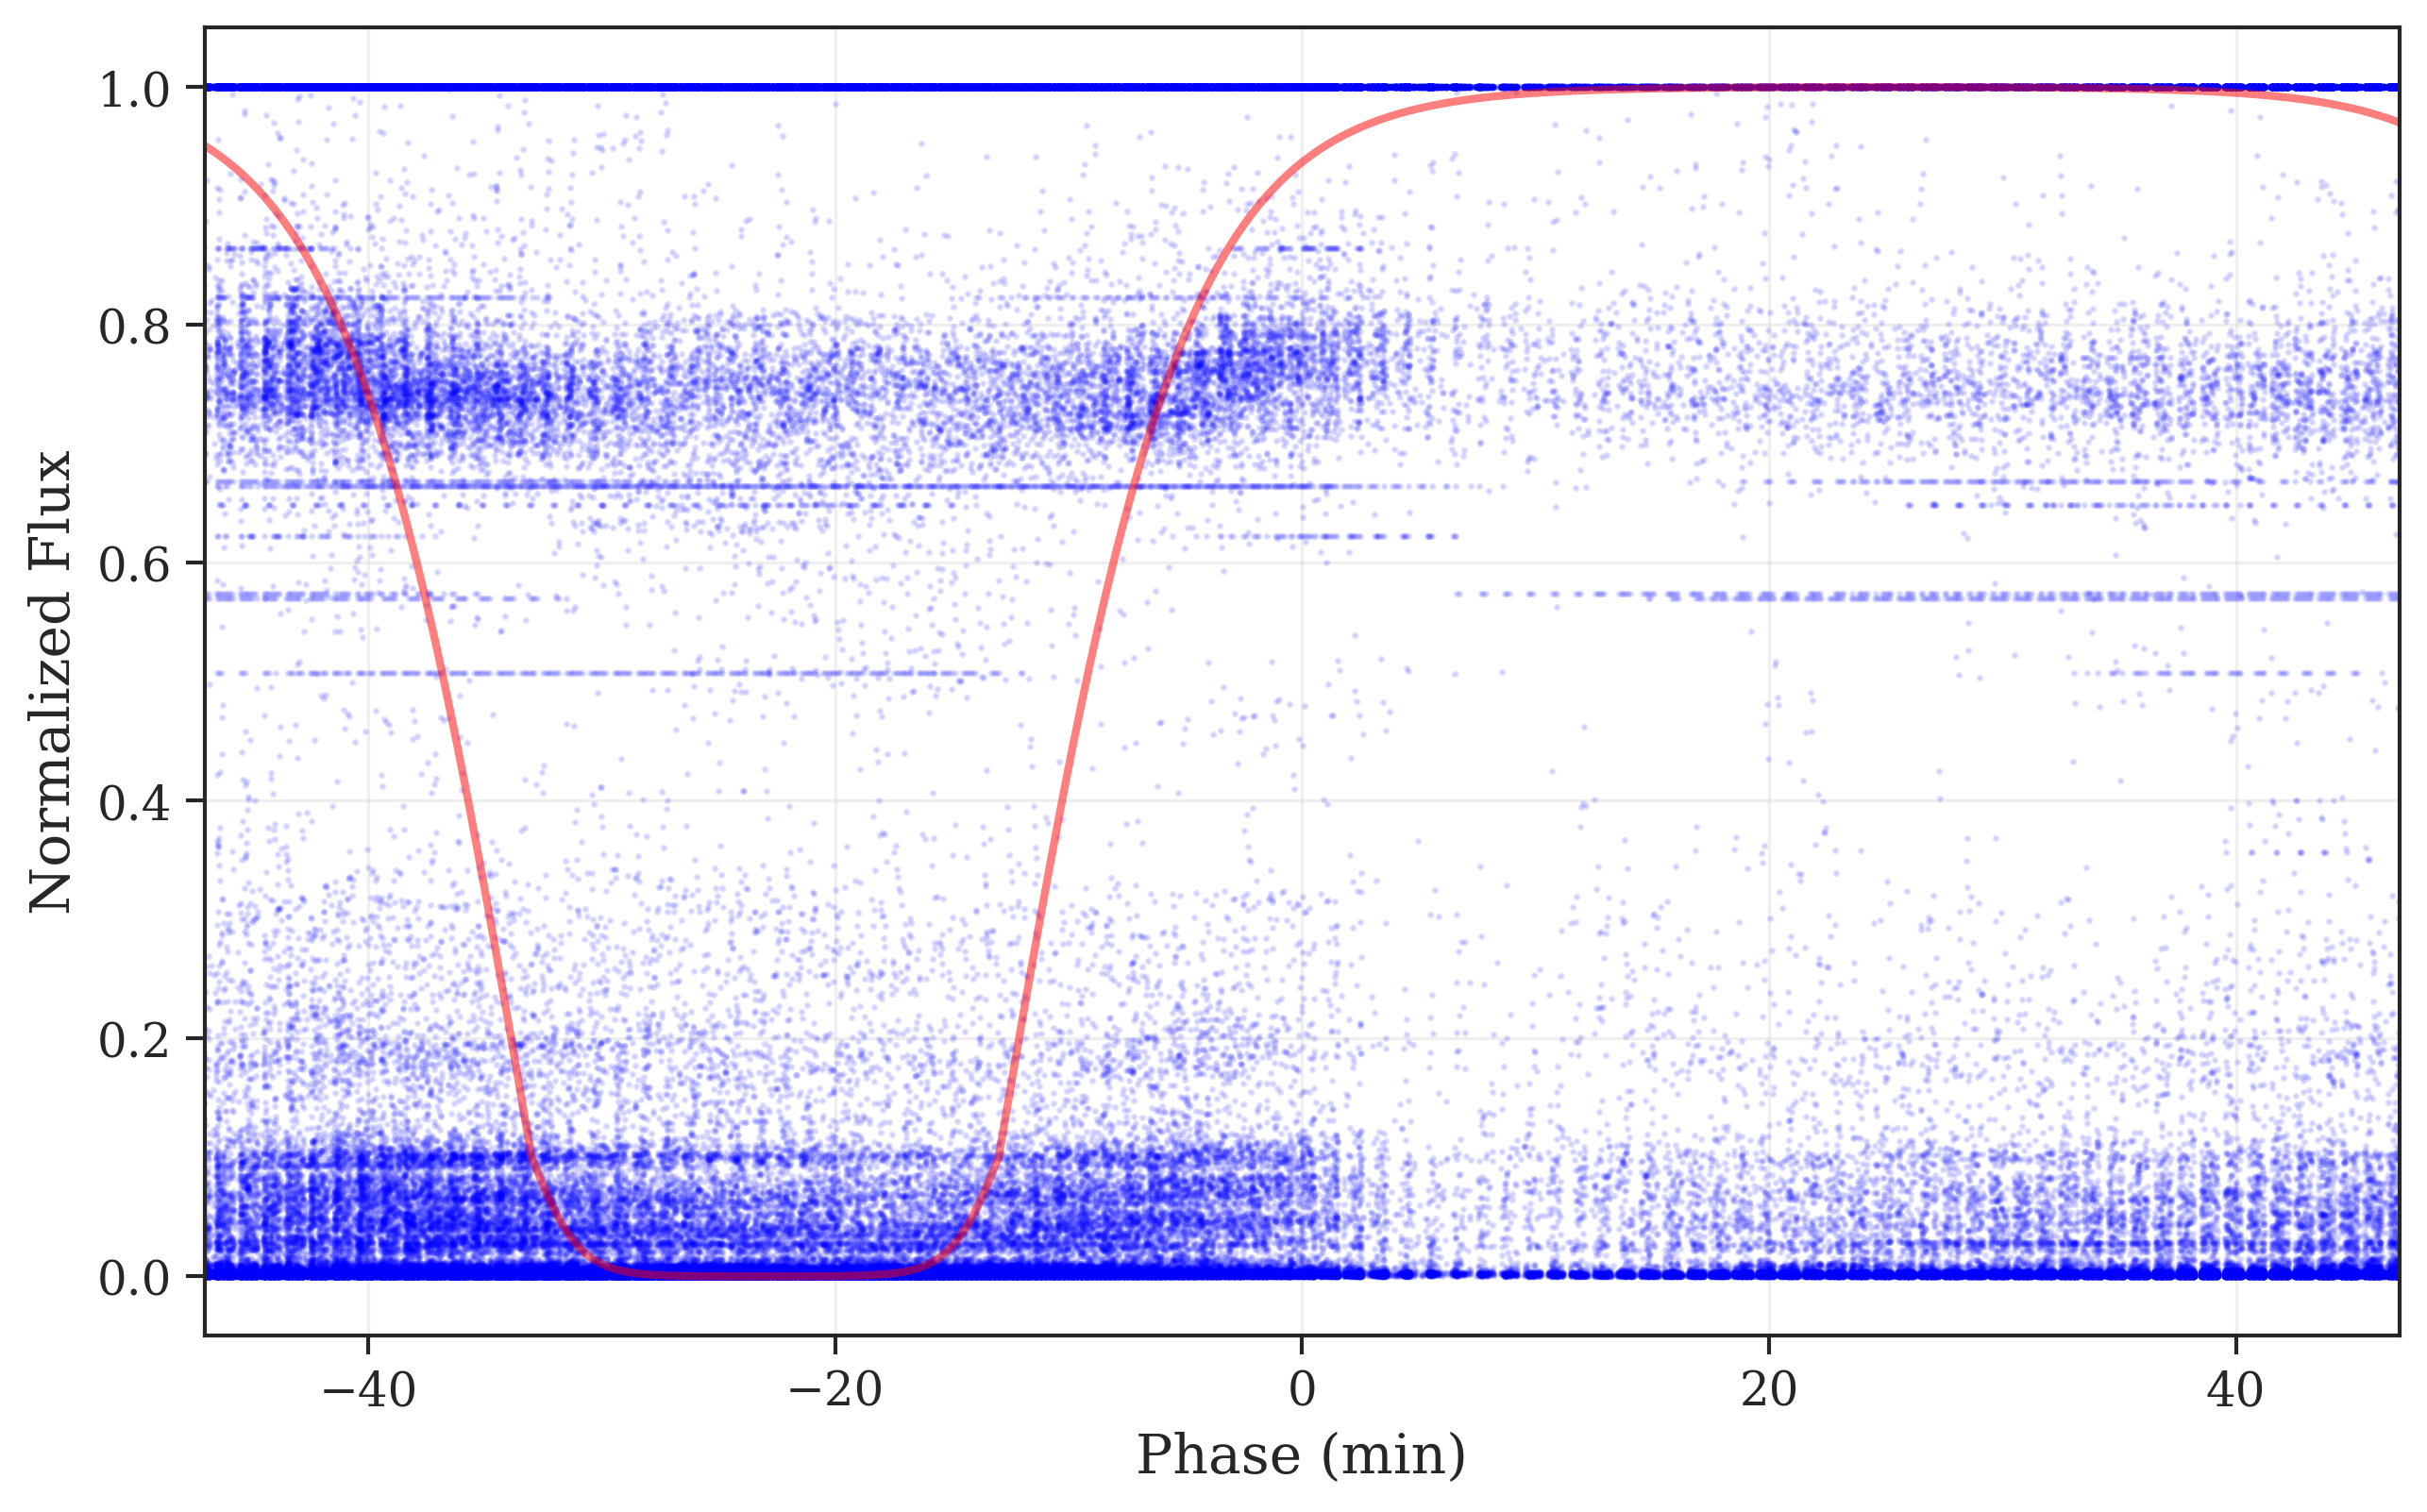

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 


from matplotlib.ticker import ScalarFormatter

# Configuración avanzada de Seaborn y Matplotlib
sns.set_context("paper", font_scale=1.5)  # Ajuste de tamaño de fuente para publicaciones
sns.set_style("ticks")  # Estilo limpio con ticks visibles
sns.set_palette("muted")  # Paleta de colores suave y profesional

# Configuración adicional de Matplotlib
plt.rcParams.update({
    "axes.titlesize": 14,      # Tamaño de los títulos de los ejes
    "axes.labelsize": 12,      # Tamaño de las etiquetas de los ejes
    "xtick.labelsize": 10,     # Tamaño de las etiquetas del eje X
    "ytick.labelsize": 10,     # Tamaño de las etiquetas del eje Y
    "legend.fontsize": 10,     # Tamaño de la leyenda
    "font.family": "serif",    # Tipo de fuente: preferido en publicaciones científicas
    "figure.dpi": 300,         # Resolución de la figura
    "savefig.dpi": 300,        # Resolución de exportación
    "figure.figsize": (20, 6), # Tamaño de la figura (ajustado)
    "axes.grid": True,         # Activar cuadrícula
    "grid.alpha": 0.3,         # Transparencia de la cuadrícula
    "lines.linewidth": 2,      # Grosor de las líneas
})




# Configuración avanzada de Seaborn
#sns.set(style='darkgrid', palette='deep', font_scale=1.2)  # Estilo y paleta de colores
#sns.set_context("talk", rc={"axes.titlesize": 18, "axes.labelsize": 14})  # Ajustar el contexto para presentaciones

# Archivos de entrada
archivo_linea = "jacobi_1.0_E76.0_S20.0_m0.999_W10.0_desplazamiento10.0.dat"
archivo_scatter = "phasefolding_periodicidad_95.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] - 205

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# Insertamos NaN para crear discontinuidades entre tramos
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear una nueva lista para almacenar los datos con NaN para discontinuidad
x_discontinuo = []
y_discontinuo = []

for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN para interrumpir la conexión entre puntos
    if abs(x_vals[i + 1] - x_vals[i]) > 1:  # Aquí decidimos cuándo poner NaN, por ejemplo, si la diferencia es mayor a 1
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua (con NaN)
#plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-', linewidth=2, alpha=0.8)
plt.plot(x_discontinuo, y_discontinuo,  color='red', linestyle='-', linewidth=2, alpha=0.5)

# Graficar el scatter
#plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=10, alpha=0.5)
plt.scatter(data_scatter['x'], data_scatter['y'],  color='blue', s=1, alpha=0.1)

## Añadir anotaciones con flechas
#plt.annotate(
#    '79.17 min',  # El número que quieres mostrar
#    xy=(23, 0.85),  # Coordenadas de la flecha
#    xytext=(23, 0.5),  # Posición del texto
#    ha='center',  # Alinear el texto al centro
#    va='center',  # Alinear el texto verticalmente
#    #fontsize=12,
#    #fontweight='bold',
#    color='black',
#    arrowprops=dict(facecolor='black', edgecolor='black', shrink=0.05, width=1, headwidth=8, lw=1)
#)
#
## Otra anotación
#plt.annotate(
#    '18.19 min',  # El número que quieres mostrar
#    xy=(-23, 0.01),  # Coordenadas de la flecha
#    xytext=(-23, 0.5),  # Posición del texto
#    ha='center',  # Alinear el texto al centro
#    va='center',  # Alinear el texto verticalmente
#    #fontsize=12,
#    #fontweight='bold',
#    color='black',
#    arrowprops=dict(facecolor='black', edgecolor='black', shrink=0.05, width=1, headwidth=8, lw=1)
#)

# Etiquetas y título con configuraciones personalizadas
plt.xlabel("Phase (min)", fontsize=14)
plt.ylabel("Normalized Flux", fontsize=14)
#plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function", fontsize=16)

# Ajustar límites y personalizar el formato de los ejes
plt.xlim(-47, 47)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadir una leyenda
#plt.legend(fontsize=12, loc='upper right')

# Mejorar la visualización y diseño
#plt.tight_layout()

# Guardar la figura
plt.savefig("images/phasefold_jacobi_1_periods_sample1.pdf", format='pdf', bbox_inches="tight", dpi=300)

# Mostrar la gráfica
plt.show()


/tmp/ipykernel_8283/2729305325.py:41: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_8283/2729305325.py:42: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


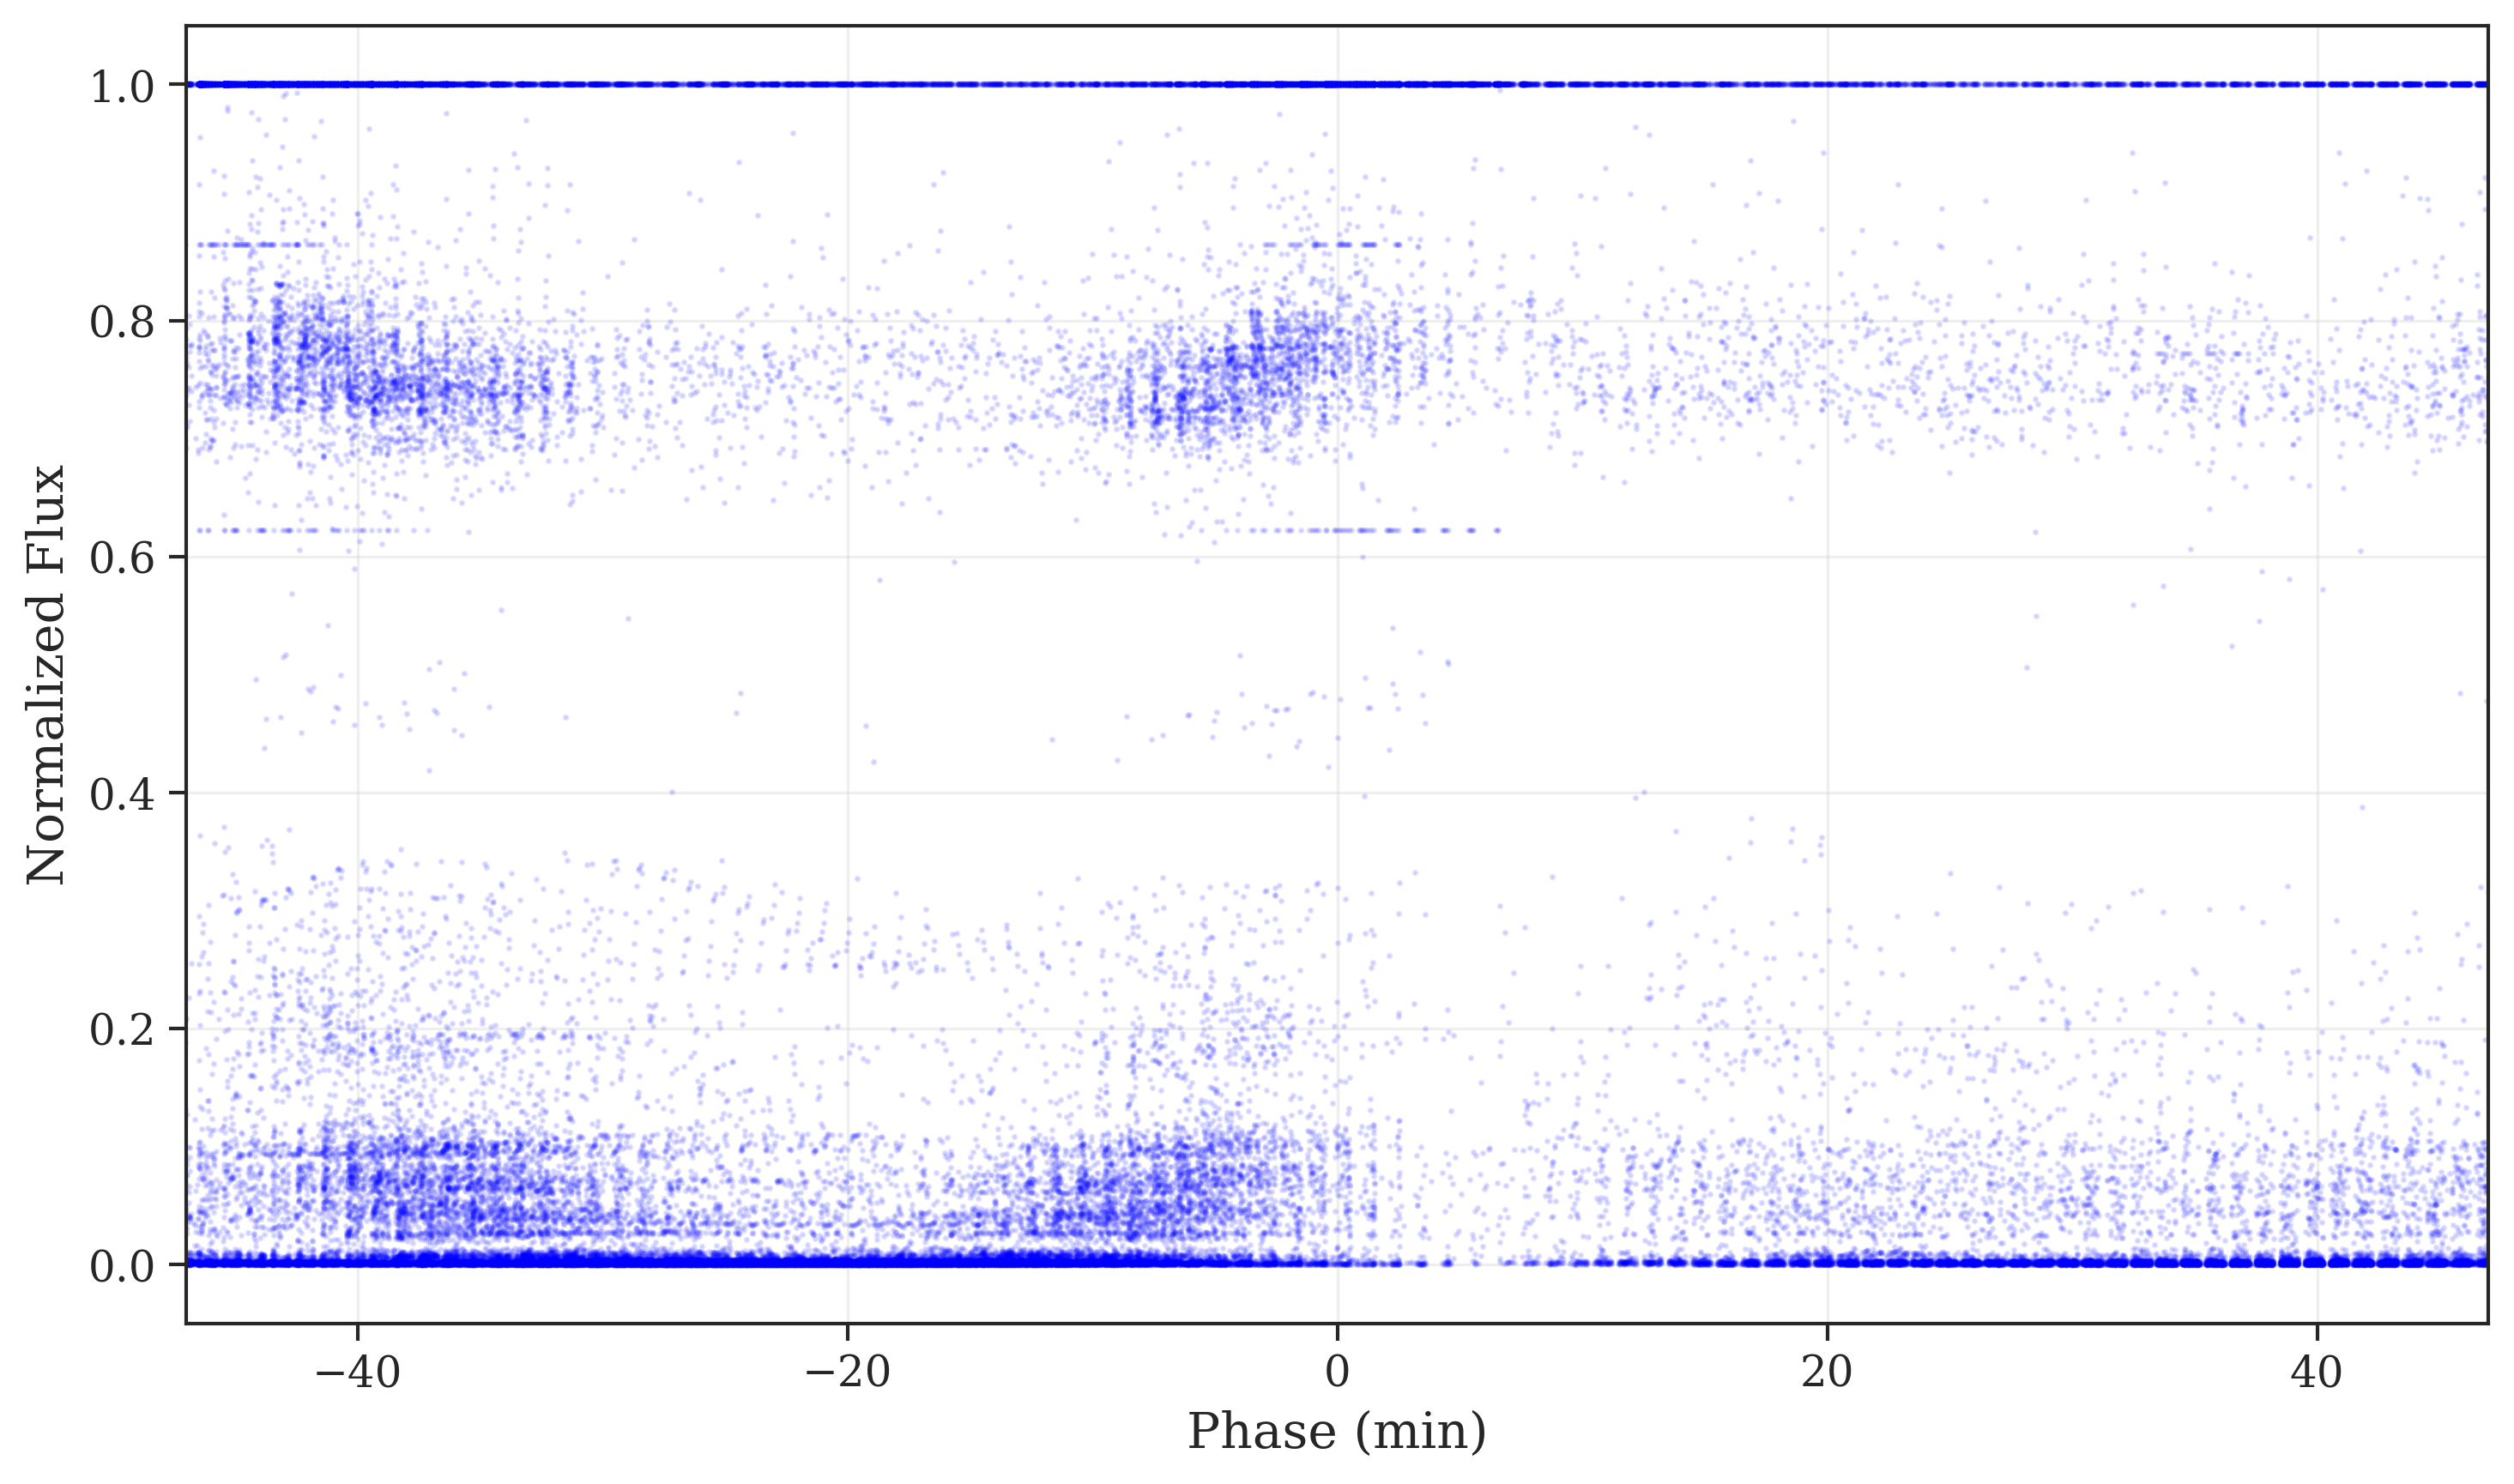

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib.ticker import ScalarFormatter

# Configuración avanzada de Seaborn y Matplotlib
sns.set_context("paper", font_scale=1.5)  # Ajuste de tamaño de fuente para publicaciones
sns.set_style("ticks")  # Estilo limpio con ticks visibles
sns.set_palette("muted")  # Paleta de colores suave y profesional

# Configuración adicional de Matplotlib
plt.rcParams.update({
    "axes.titlesize": 14,      # Tamaño de los títulos de los ejes
    "axes.labelsize": 12,      # Tamaño de las etiquetas de los ejes
    "xtick.labelsize": 10,     # Tamaño de las etiquetas del eje X
    "ytick.labelsize": 10,     # Tamaño de las etiquetas del eje Y
    "legend.fontsize": 10,     # Tamaño de la leyenda
    "font.family": "serif",    # Tipo de fuente: preferido en publicaciones científicas
    "figure.dpi": 300,         # Resolución de la figura
    "savefig.dpi": 300,        # Resolución de exportación
    "figure.figsize": (20, 6), # Tamaño de la figura (ajustado)
    "axes.grid": True,         # Activar cuadrícula
    "grid.alpha": 0.3,         # Transparencia de la cuadrícula
    "lines.linewidth": 2,      # Grosor de las líneas
})




# Configuración avanzada de Seaborn
#sns.set(style='darkgrid', palette='deep', font_scale=1.2)  # Estilo y paleta de colores
#sns.set_context("talk", rc={"axes.titlesize": 18, "axes.labelsize": 14})  # Ajustar el contexto para presentaciones

# Archivos de entrada
#archivo_linea = "jacobi_0.86_E76.0_S20.0_m0.999_W10.0_desplazamiento10.0.dat"
archivo_scatter = "phasefolding_periodicidad_95.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] - 205

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# Insertamos NaN para crear discontinuidades entre tramos
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear una nueva lista para almacenar los datos con NaN para discontinuidad
x_discontinuo = []
y_discontinuo = []

for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN para interrumpir la conexión entre puntos
    if abs(x_vals[i + 1] - x_vals[i]) > 1:  # Aquí decidimos cuándo poner NaN, por ejemplo, si la diferencia es mayor a 1
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua (con NaN)
#plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-', linewidth=2, alpha=0.8)
#plt.plot(x_discontinuo, y_discontinuo,  color='blue', linestyle='-', linewidth=2, alpha=0.3)

# Graficar el scatter
#plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='red', s=10, alpha=0.5)
plt.scatter(data_scatter['x'], data_scatter['y'],  color='blue', s=1, alpha=0.1)
# Etiquetas y título con configuraciones personalizadas
plt.xlabel("Phase (min)", fontsize=14)
plt.ylabel("Normalized Flux", fontsize=14)
#plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function", fontsize=16)

# Ajustar límites y personalizar el formato de los ejes
plt.xlim(-47, 47)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadir una leyenda
plt.legend(fontsize=12, loc='upper right')

# Mejorar la visualización y diseño
plt.tight_layout()

# Guardar la figura
plt.savefig("images/phasefold_scater_1_periods_sample1.pdf", format='pdf', bbox_inches="tight", dpi=300)

# Mostrar la gráfica
plt.show()



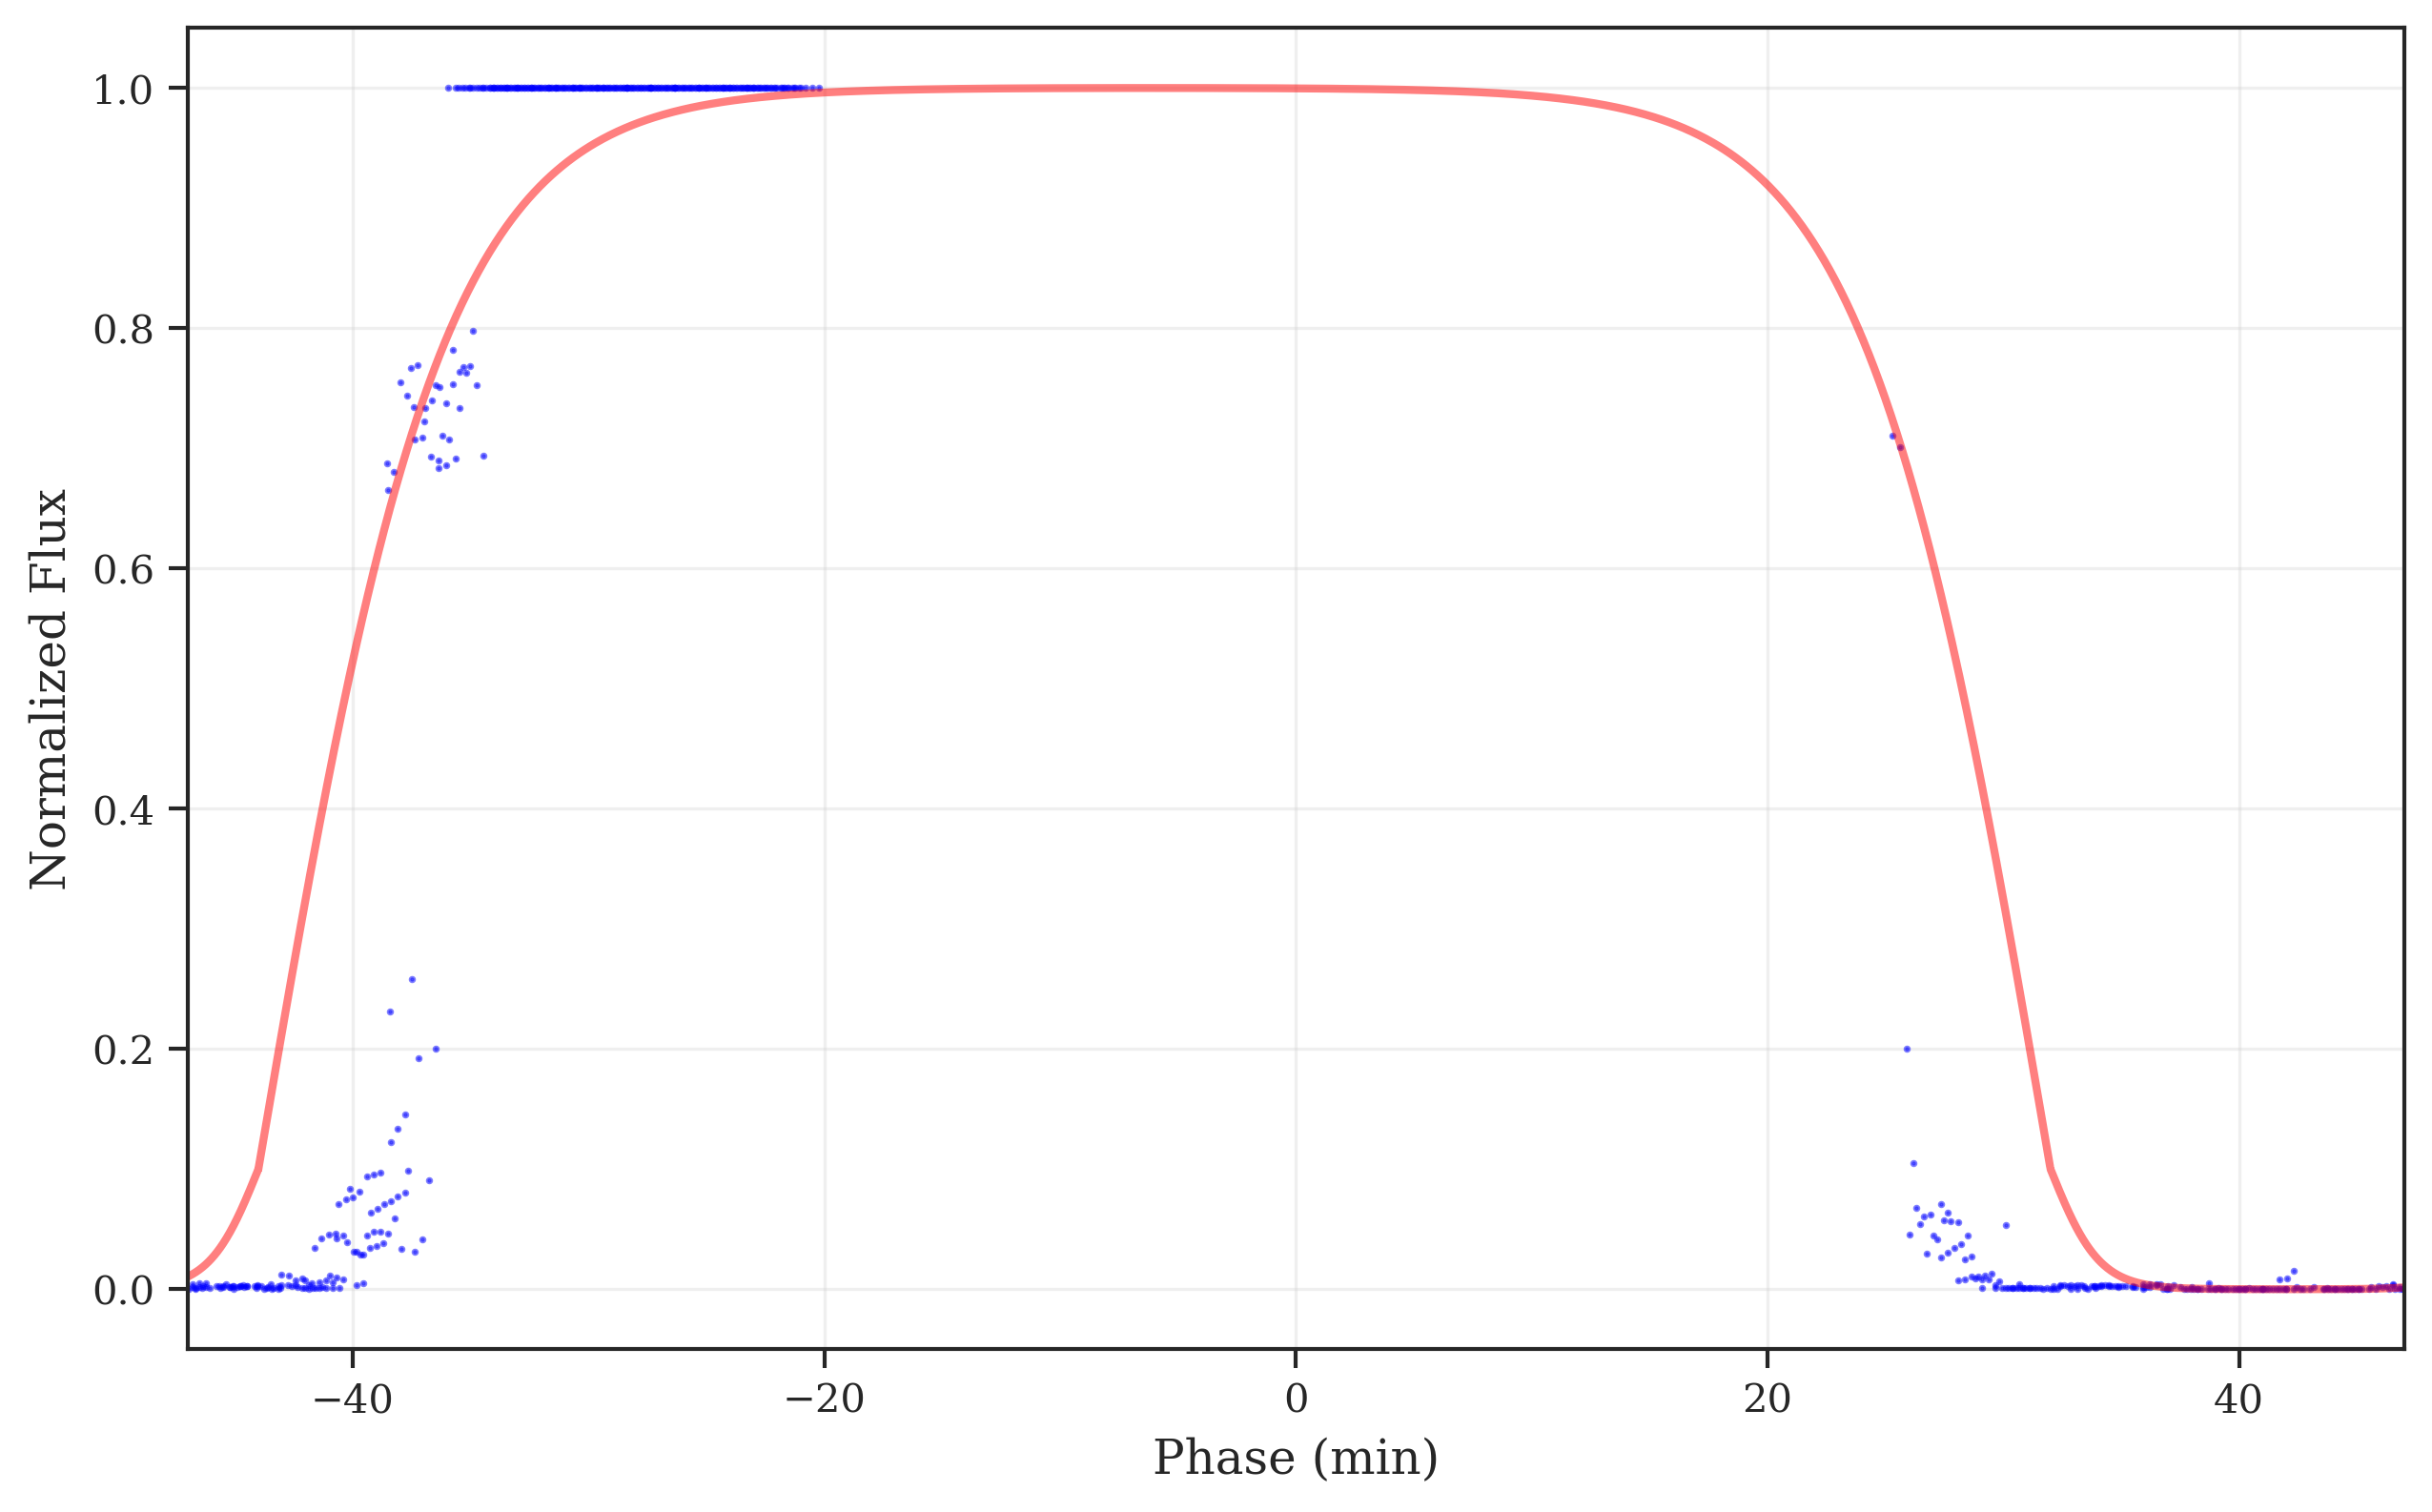

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Configuración avanzada de Seaborn y Matplotlib
sns.set_context("paper", font_scale=1.5)  # Ajuste de tamaño de fuente para publicaciones
sns.set_style("ticks")  # Estilo limpio con ticks visibles
sns.set_palette("muted")  # Paleta de colores suave y profesional

# Configuración adicional de Matplotlib
plt.rcParams.update({
    "axes.titlesize": 14,      # Tamaño de los títulos de los ejes
    "axes.labelsize": 12,      # Tamaño de las etiquetas de los ejes
    "xtick.labelsize": 10,     # Tamaño de las etiquetas del eje X
    "ytick.labelsize": 10,     # Tamaño de las etiquetas del eje Y
    "legend.fontsize": 10,     # Tamaño de la leyenda
    "font.family": "serif",    # Tipo de fuente: preferido en publicaciones científicas
    "figure.dpi": 300,         # Resolución de la figura
    "savefig.dpi": 300,        # Resolución de exportación
    "figure.figsize": (20, 6), # Tamaño de la figura (ajustado)
    "axes.grid": True,         # Activar cuadrícula
    "grid.alpha": 0.3,         # Transparencia de la cuadrícula
    "lines.linewidth": 2,      # Grosor de las líneas
})







# Configuración de Seaborn
#sns.set(style='darkgrid')

# Archivos de entrada
archivo_linea = "jacobi_1.0_E76.0_S20.0_m0.999_W10.0_desplazamiento10.0.dat"
# archivo_linea = "jacobi_0.86_E0.049_S0.017_m0.999_W10.0_desplazamiento10.0.dat"
archivo_scatter = "datos_phasefolding_sagA_570844801.dat.csv"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] - 236

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# Insertamos NaN para crear discontinuidades entre tramos
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear una nueva lista para almacenar los datos con NaN para discontinuidad
x_discontinuo = []
y_discontinuo = []

for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN para interrumpir la conexión entre puntos
    if abs(x_vals[i + 1] - x_vals[i]) > 1:  # Aquí decidimos cuándo poner NaN, por ejemplo, si la diferencia es mayor a 1
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua (con NaN)
plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='red', linestyle='-', alpha=.5)

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='blue', s=1, alpha=.5)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
#plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-47, 47)

# Añadir leyenda
#plt.legend()

# Mostrar la gráfica
plt.savefig("images/phasefold_jacobi_sagA_570844801_sample1.pdf", format='pdf', bbox_inches="tight", dpi=300)

plt.show()


/tmp/ipykernel_8283/698343477.py:43: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_8283/698343477.py:44: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


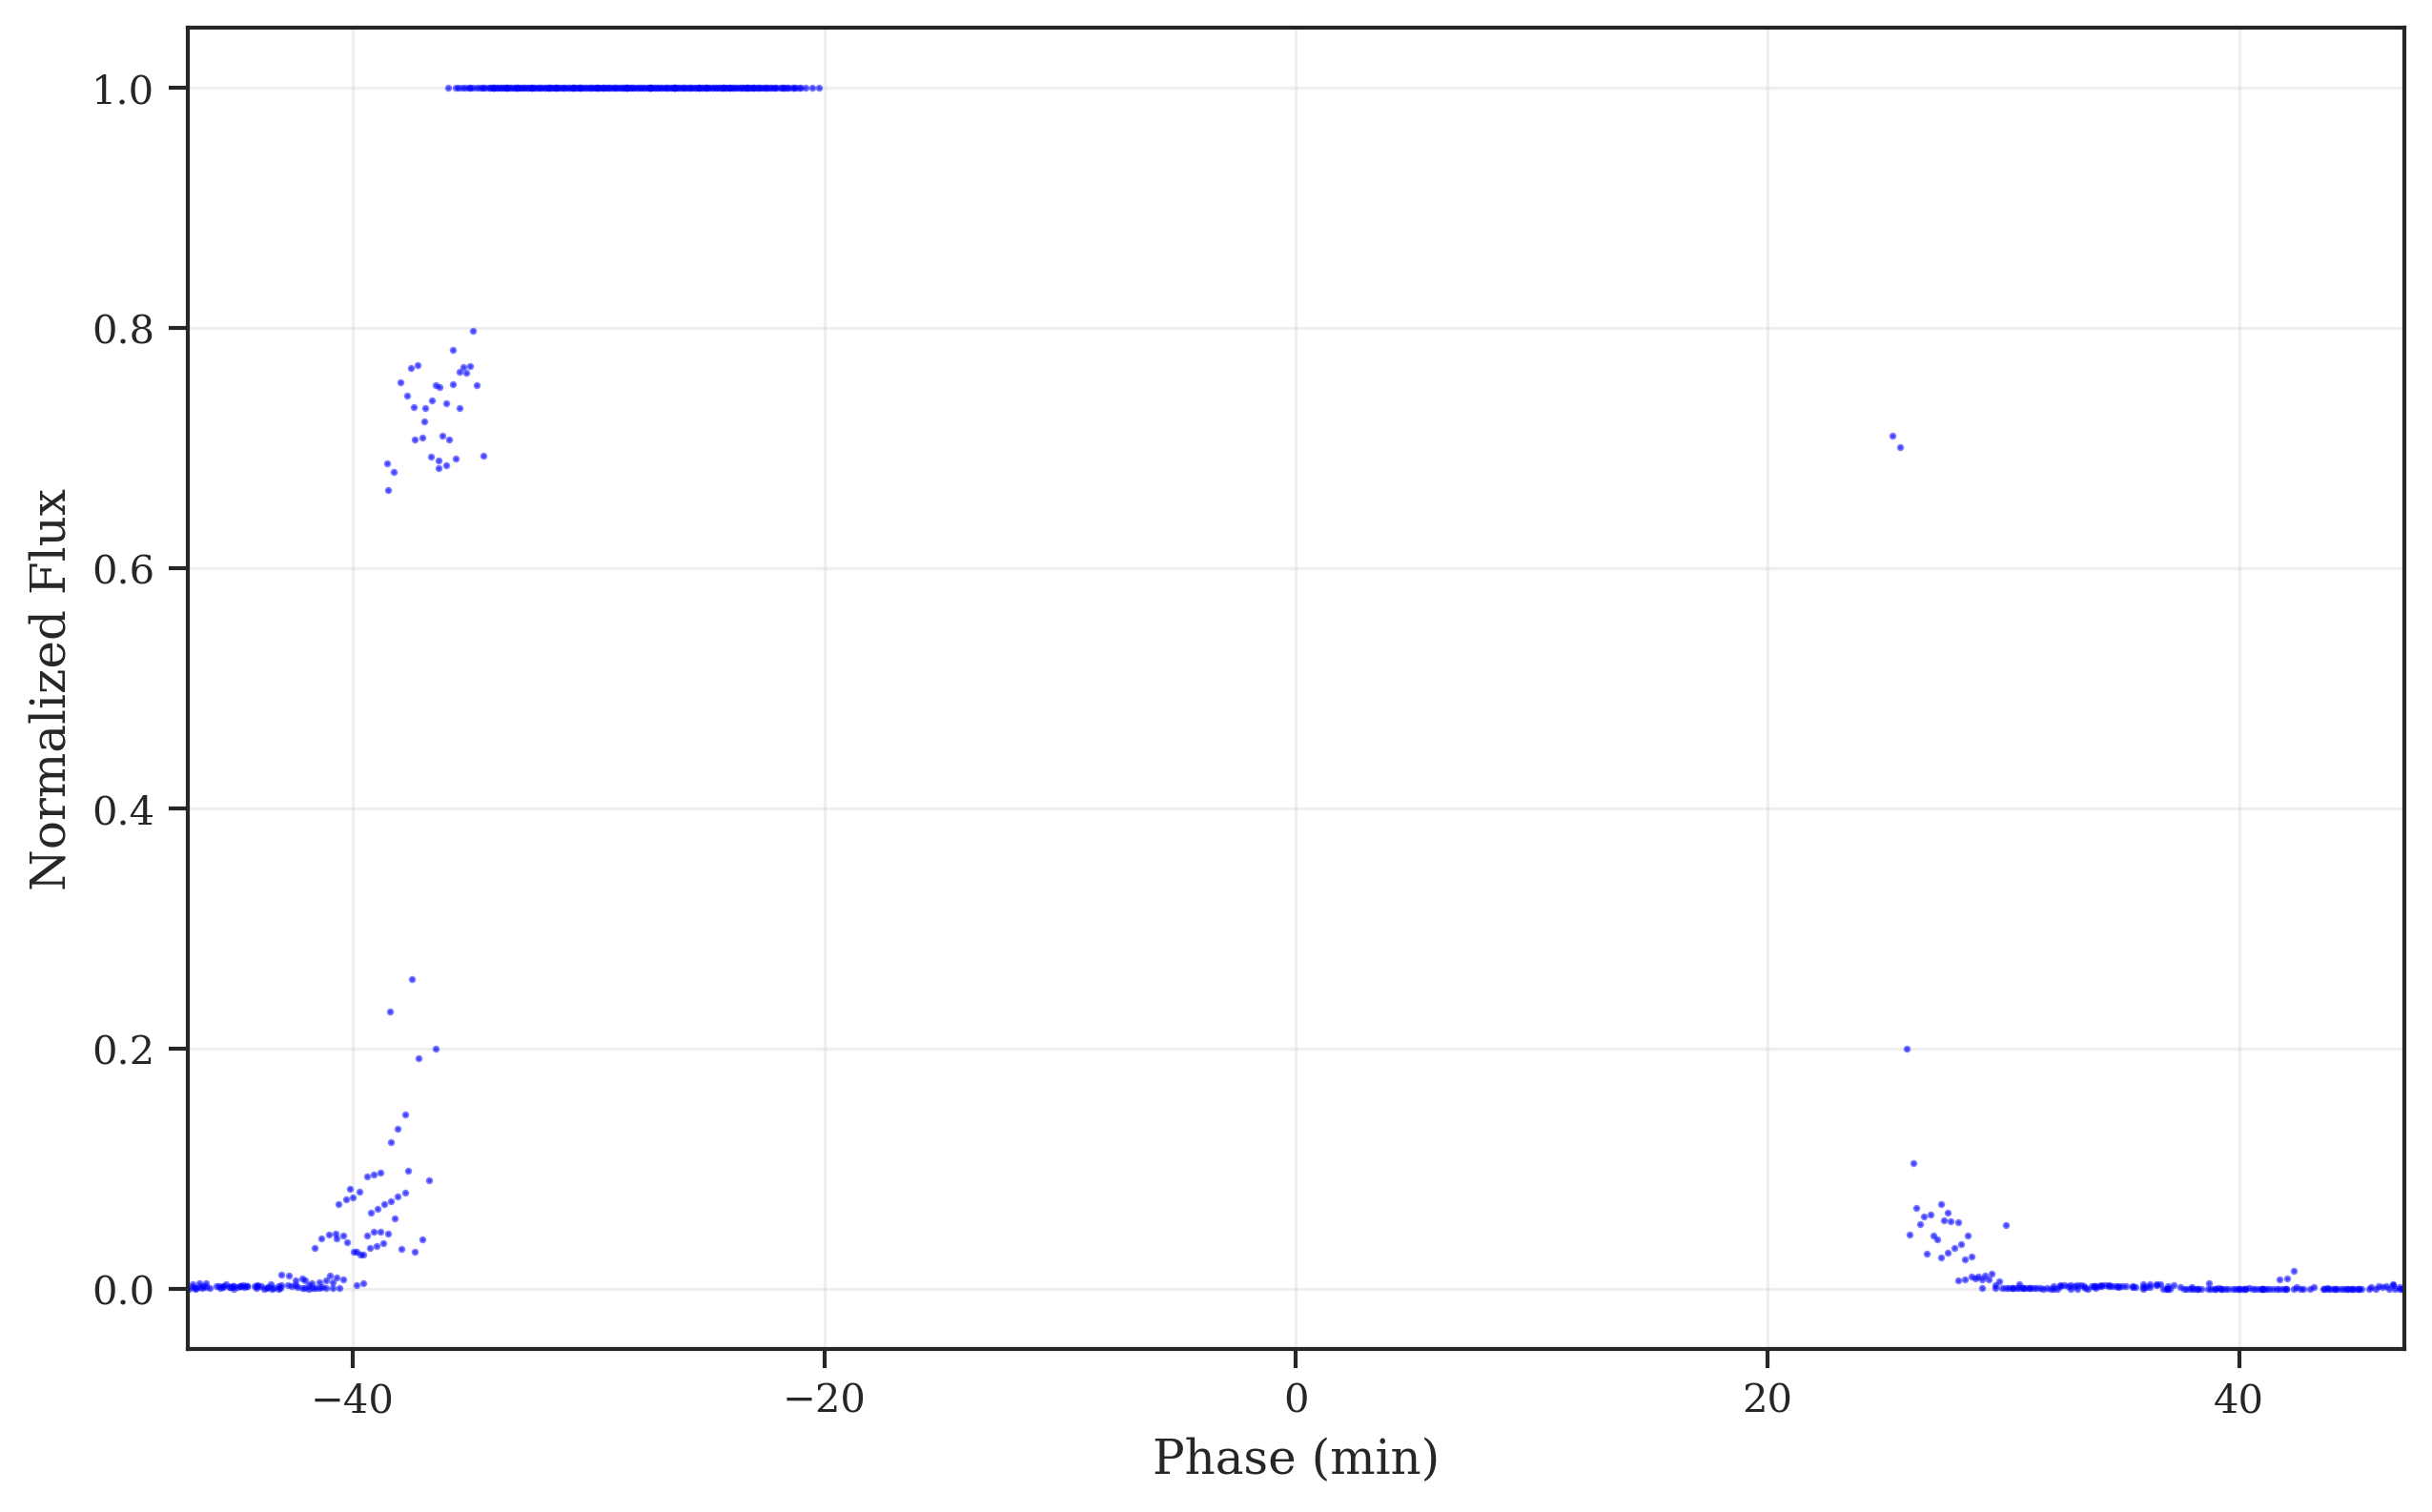

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Configuración avanzada de Seaborn y Matplotlib
sns.set_context("paper", font_scale=1.5)  # Ajuste de tamaño de fuente para publicaciones
sns.set_style("ticks")  # Estilo limpio con ticks visibles
sns.set_palette("muted")  # Paleta de colores suave y profesional

# Configuración adicional de Matplotlib
plt.rcParams.update({
    "axes.titlesize": 14,      # Tamaño de los títulos de los ejes
    "axes.labelsize": 12,      # Tamaño de las etiquetas de los ejes
    "xtick.labelsize": 10,     # Tamaño de las etiquetas del eje X
    "ytick.labelsize": 10,     # Tamaño de las etiquetas del eje Y
    "legend.fontsize": 10,     # Tamaño de la leyenda
    "font.family": "serif",    # Tipo de fuente: preferido en publicaciones científicas
    "figure.dpi": 300,         # Resolución de la figura
    "savefig.dpi": 300,        # Resolución de exportación
    "figure.figsize": (20, 6), # Tamaño de la figura (ajustado)
    "axes.grid": True,         # Activar cuadrícula
    "grid.alpha": 0.3,         # Transparencia de la cuadrícula
    "lines.linewidth": 2,      # Grosor de las líneas
})







# Configuración de Seaborn
#sns.set(style='darkgrid')

# Archivos de entrada
archivo_linea = "jacobi_0.86_E76.0_S20.0_m0.999_W10.0_desplazamiento10.0.dat"
# archivo_linea = "jacobi_0.86_E0.049_S0.017_m0.999_W10.0_desplazamiento10.0.dat"
archivo_scatter = "datos_phasefolding_sagA_570844801.dat.csv"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] - 236

# Crear la figura y el eje
plt.figure(figsize=(10, 6))

# Graficar la línea (con desplazamiento)
# Insertamos NaN para crear discontinuidades entre tramos
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear una nueva lista para almacenar los datos con NaN para discontinuidad
x_discontinuo = []
y_discontinuo = []

for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN para interrumpir la conexión entre puntos
    if abs(x_vals[i + 1] - x_vals[i]) > 1:  # Aquí decidimos cuándo poner NaN, por ejemplo, si la diferencia es mayor a 1
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua (con NaN)
#plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-', alpha=.1)

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='blue', s=1, alpha=.5)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
#plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-47, 47)

# Añadir leyenda
#plt.legend()

# Mostrar la gráfica
plt.savefig("images/phasefold_sagA_570844801_sample1.pdf", format='pdf', bbox_inches="tight", dpi=300)

plt.show()

/tmp/ipykernel_8492/3676825619.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_8492/3676825619.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)


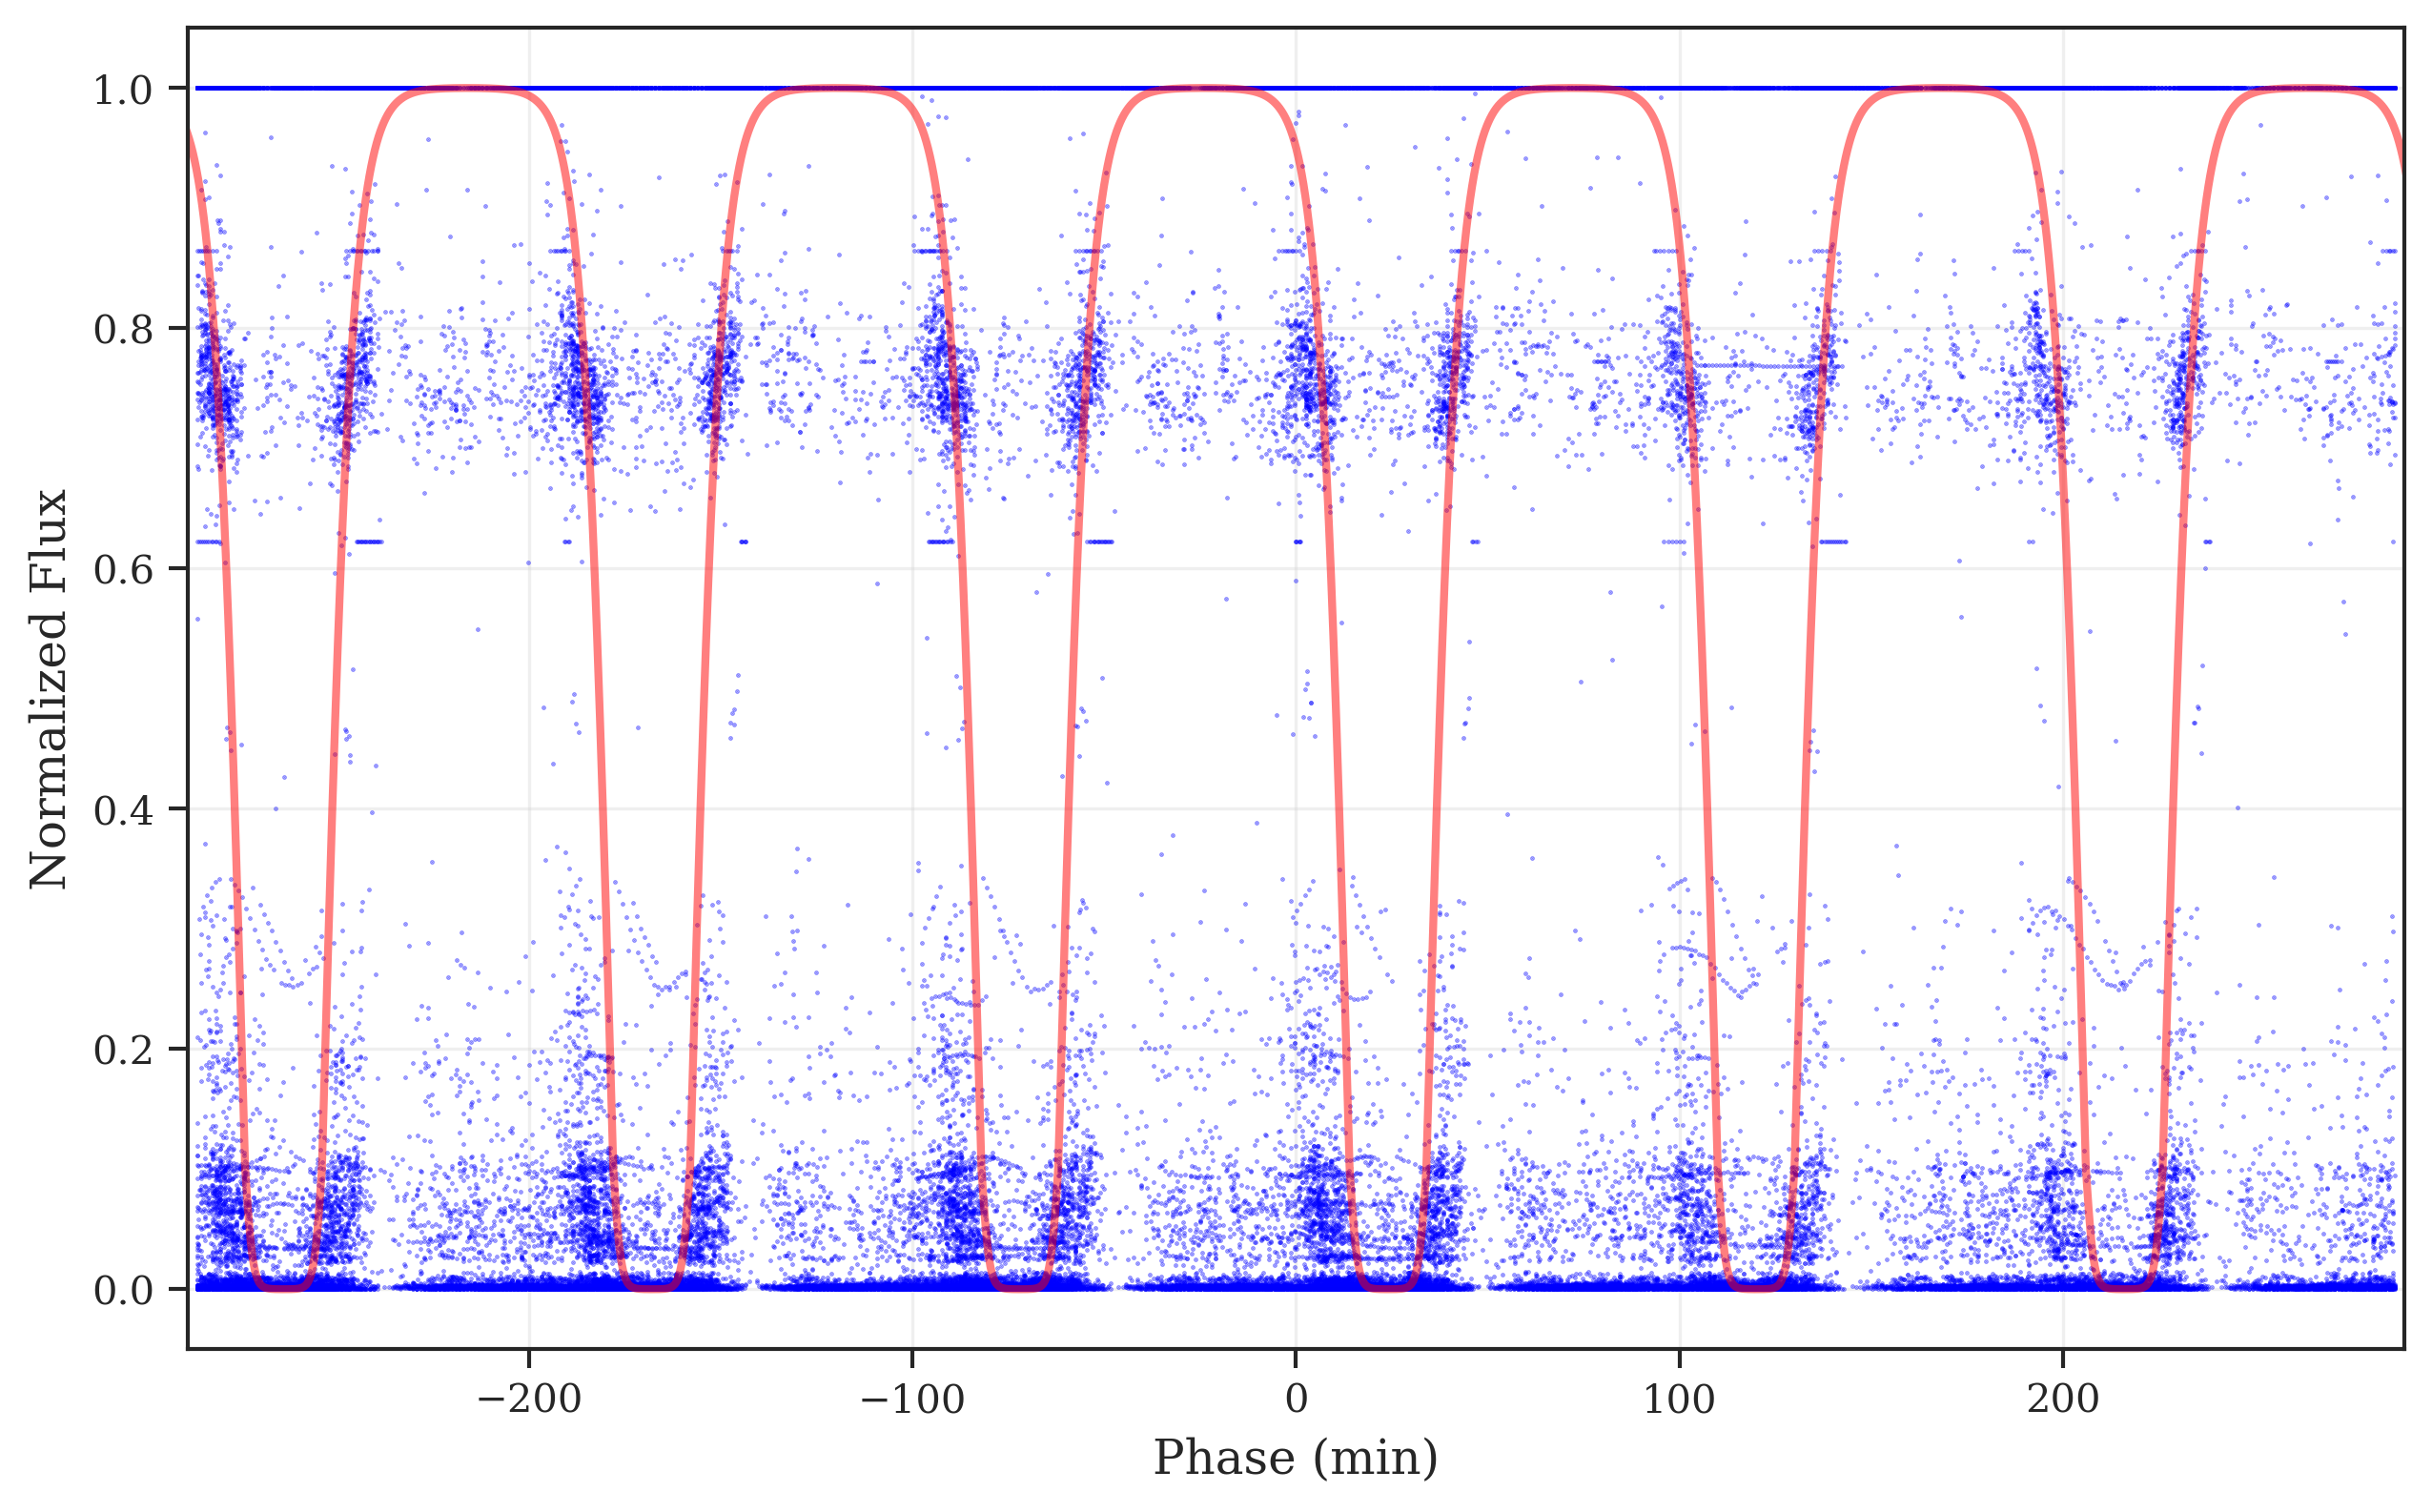

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Configuración avanzada de Seaborn y Matplotlib
sns.set_context("paper", font_scale=1.5)  # Ajuste de tamaño de fuente para publicaciones
sns.set_style("ticks")  # Estilo limpio con ticks visibles
sns.set_palette("muted")  # Paleta de colores suave y profesional

# Configuración adicional de Matplotlib
plt.rcParams.update({
    "axes.titlesize": 14,      # Tamaño de los títulos de los ejes
    "axes.labelsize": 12,      # Tamaño de las etiquetas de los ejes
    "xtick.labelsize": 10,     # Tamaño de las etiquetas del eje X
    "ytick.labelsize": 10,     # Tamaño de las etiquetas del eje Y
    "legend.fontsize": 10,     # Tamaño de la leyenda
    "font.family": "serif",    # Tipo de fuente: preferido en publicaciones científicas
    "figure.dpi": 300,         # Resolución de la figura
    "savefig.dpi": 300,        # Resolución de exportación
    "figure.figsize": (10, 6), # Tamaño de la figura (ajustado)
    "axes.grid": True,         # Activar cuadrícula
    "grid.alpha": 0.3,         # Transparencia de la cuadrícula
    "lines.linewidth": 2,      # Grosor de las líneas
})

# Archivos de entrada
archivo_linea = "jacobi_1.0_E76.0_S20.0_m0.999_W10.0_desplazamiento10.0.dat"
#archivo_linea = "jacobi_1.0_E77.0_S18.0_m0.999_W10.0_desplazamiento10.0.dat"
# archivo_scatter = "phasefolding_periodicidad_191.dat"
archivo_scatter = "phasefolding_periodicidad_573.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] - 350

# Crear la figura y el eje
#plt.figure(figsize=(10, 5.5))

# Graficar la línea (con desplazamiento)
# Insertamos NaN para crear discontinuidades entre tramos
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear una nueva lista para almacenar los datos con NaN para discontinuidad
x_discontinuo = []
y_discontinuo = []

for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN para interrumpir la conexión entre puntos
    if abs(x_vals[i + 1] - x_vals[i]) > 1:  # Aquí decidimos cuándo poner NaN, por ejemplo, si la diferencia es mayor a 1
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua (con NaN)
plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='red', linestyle='-', alpha=.5)

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='blue', s=.1, alpha=.5)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
#plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-289,289)

# Añadir leyenda
#plt.legend()

# Mostrar la gráfica
#plt.savefig("images/phasefold_jacobi_6_periods_sample1.pdf", format='pdf',  bbox_inches="tight")

plt.show()


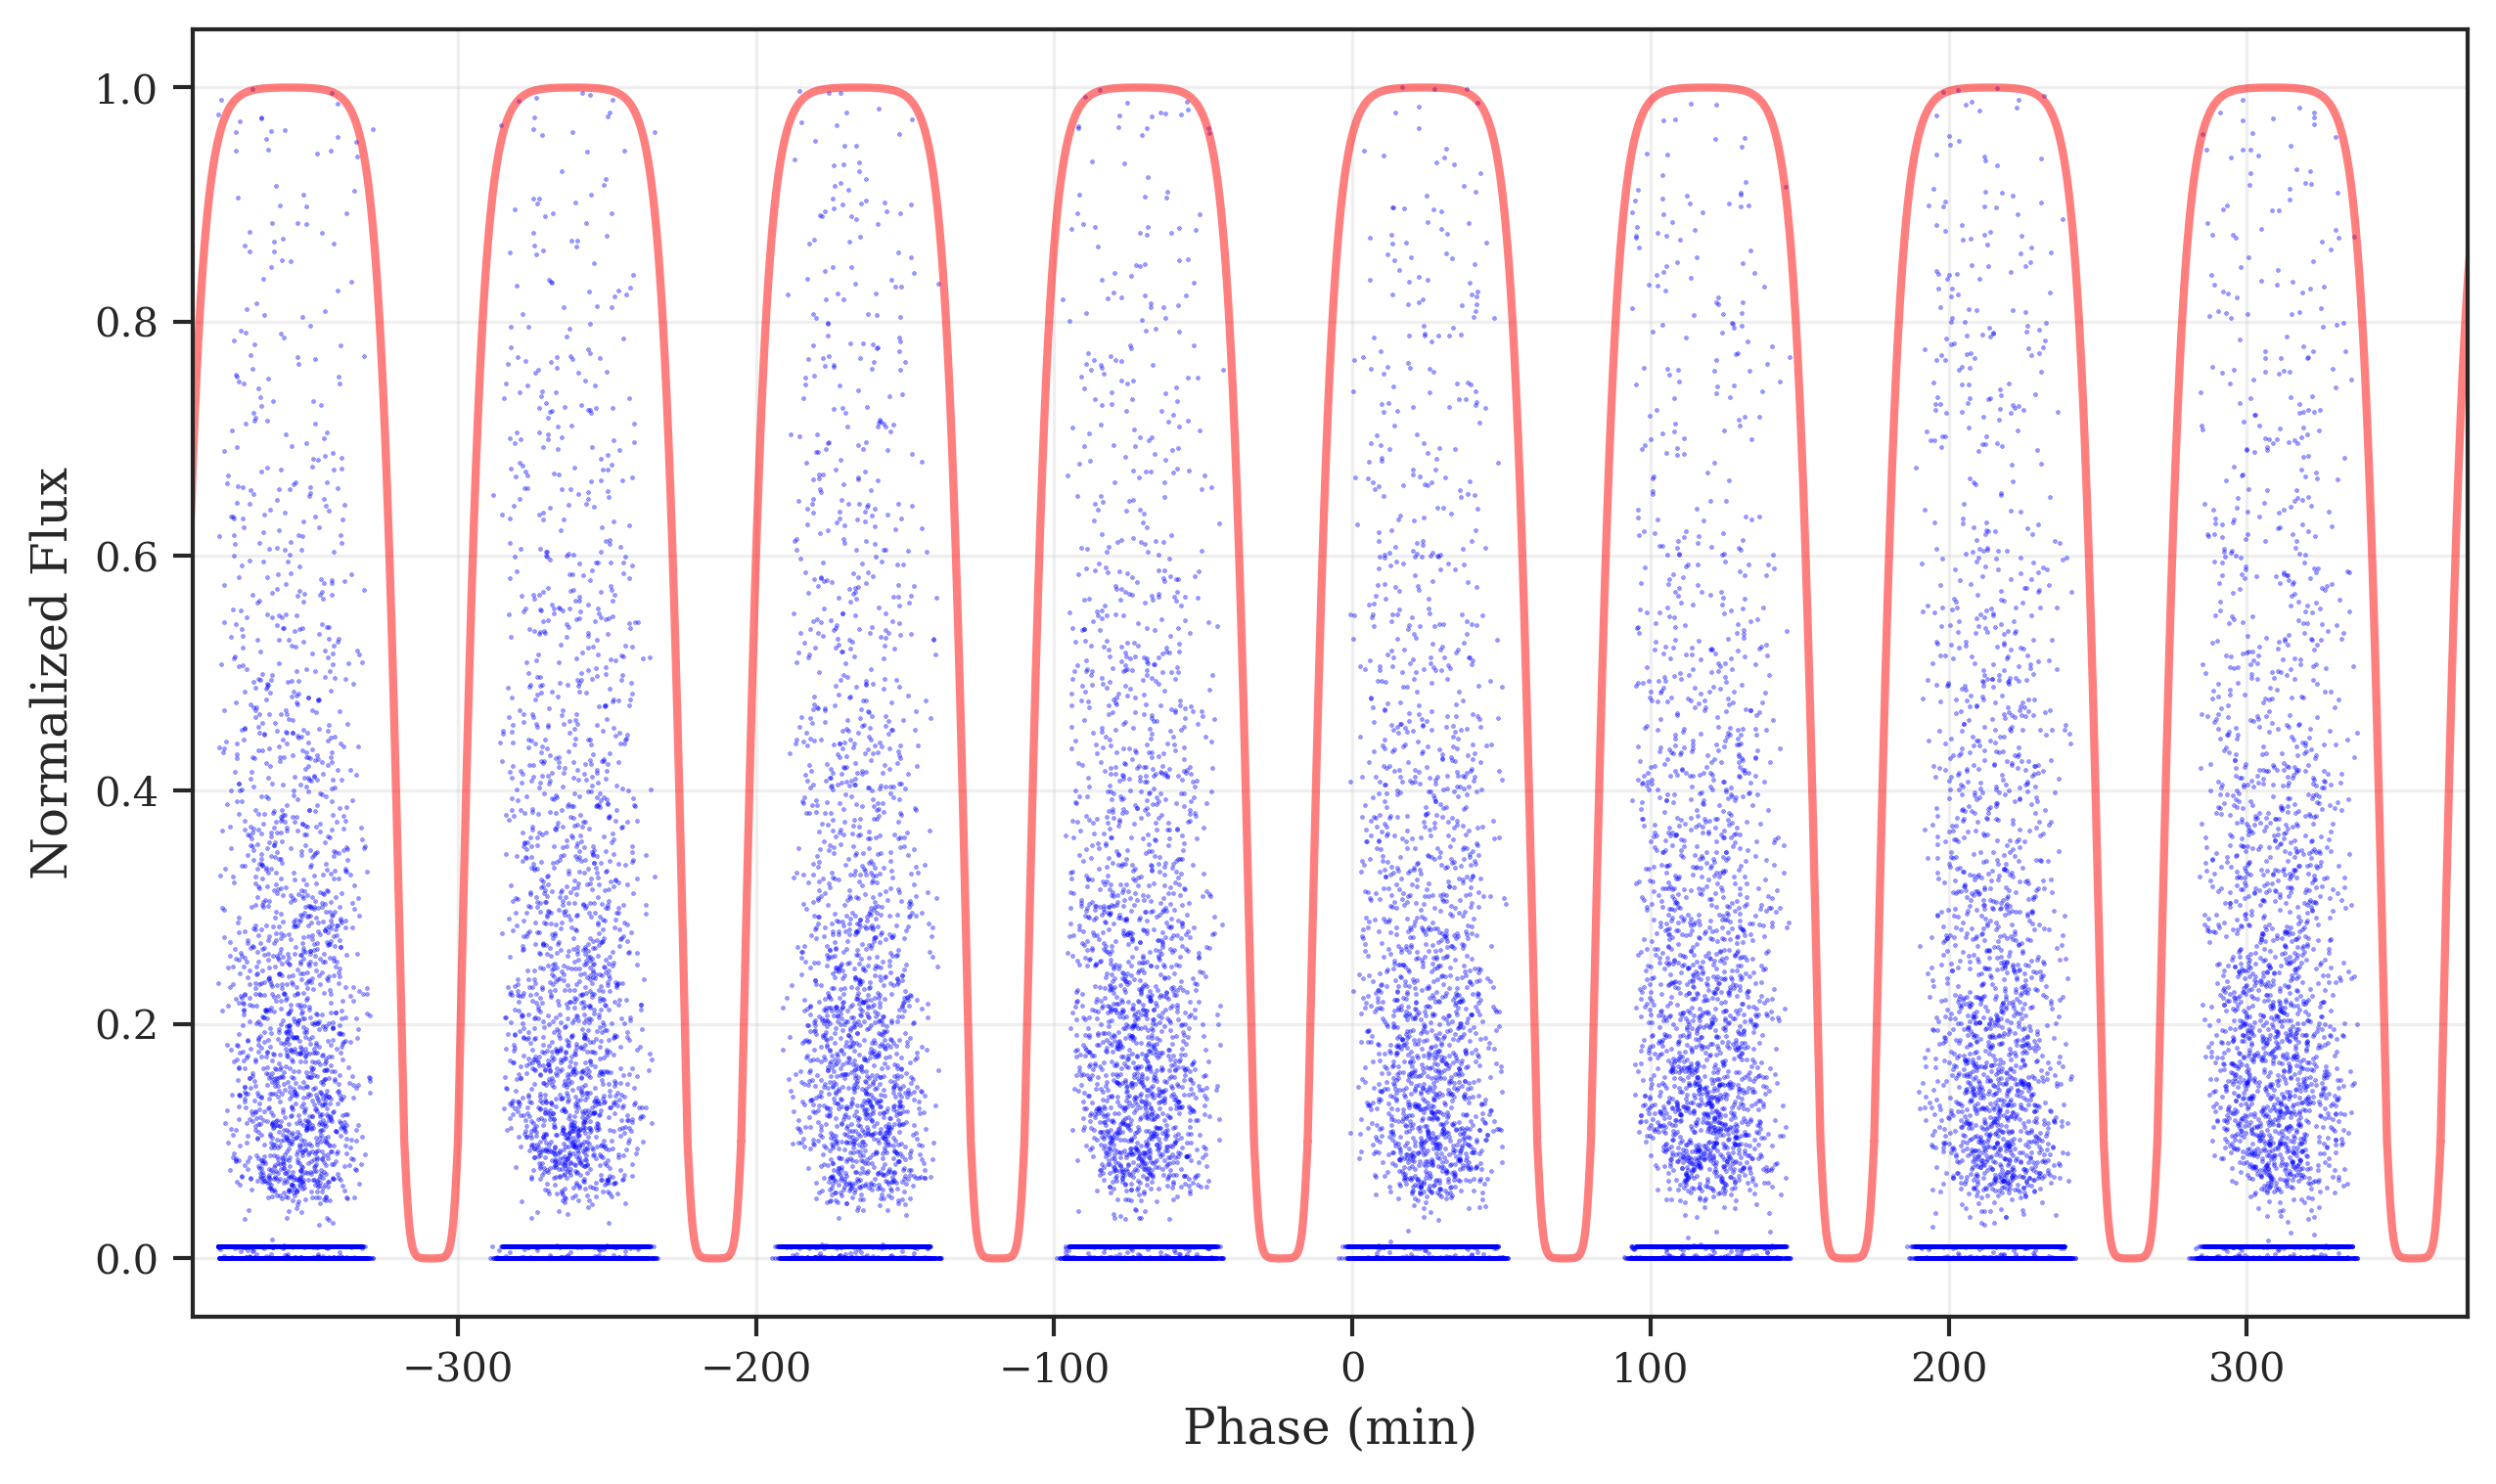

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Configuración avanzada de Seaborn y Matplotlib
sns.set_context("paper", font_scale=1.5)  # Ajuste de tamaño de fuente para publicaciones
sns.set_style("ticks")  # Estilo limpio con ticks visibles
sns.set_palette("muted")  # Paleta de colores suave y profesional

# Configuración adicional de Matplotlib
plt.rcParams.update({
    "axes.titlesize": 14,      # Tamaño de los títulos de los ejes
    "axes.labelsize": 12,      # Tamaño de las etiquetas de los ejes
    "xtick.labelsize": 10,     # Tamaño de las etiquetas del eje X
    "ytick.labelsize": 10,     # Tamaño de las etiquetas del eje Y
    "legend.fontsize": 10,     # Tamaño de la leyenda
    "font.family": "serif",    # Tipo de fuente: preferido en publicaciones científicas
    "figure.dpi": 300,         # Resolución de la figura
    "savefig.dpi": 300,        # Resolución de exportación
    "figure.figsize": (10, 6), # Tamaño de la figura (ajustado)
    "axes.grid": True,         # Activar cuadrícula
    "grid.alpha": 0.3,         # Transparencia de la cuadrícula
    "lines.linewidth": 2,      # Grosor de las líneas
})

# Archivos de entrada
archivo_linea = "jacobi_1.0_E77.0_S18.0_m0.999_W10.0_desplazamiento10.0.dat"
# archivo_scatter = "phasefolding_periodicidad_191.dat"
archivo_scatter = "phasefolding_periodicidad_761.datgrupo de rescate que ayuda a migrantes en la frintera EEUU mexico

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] - 395

# Crear la figura y el eje
#plt.figure(figsize=(10, 5.5))

# Graficar la línea (con desplazamiento)
# Insertamos NaN para crear discontinuidades entre tramos
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear una nueva lista para almacenar los datos con NaN para discontinuidad
x_discontinuo = []
y_discontinuo = []

for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN para interrumpir la conexión entre puntos
    if abs(x_vals[i + 1] - x_vals[i]) > 1:  # Aquí decidimos cuándo poner NaN, por ejemplo, si la diferencia es mayor a 1
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua (con NaN)
plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='red', linestyle='-', alpha=.5)

# Graficar el scatter
plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='blue', s=.1, alpha=.5)

# Etiquetas y título
plt.xlabel("Phase (min)")
plt.ylabel("Normalized Flux")
#plt.title("Phasefold Lightcurve Sgr A* 95 min and Jacobi Elliptical Function")
plt.xlim(-389,374)

# Añadir leyenda
#plt.legend()

# Mostrar la gráfica
plt.savefig("images/serie_phasefold_jacobi_8_periods.pdf", format='pdf',  bbox_inches="tight")

plt.show()



# Segunda muestra

/tmp/ipykernel_5007/2219436626.py:34: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_5007/2219436626.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


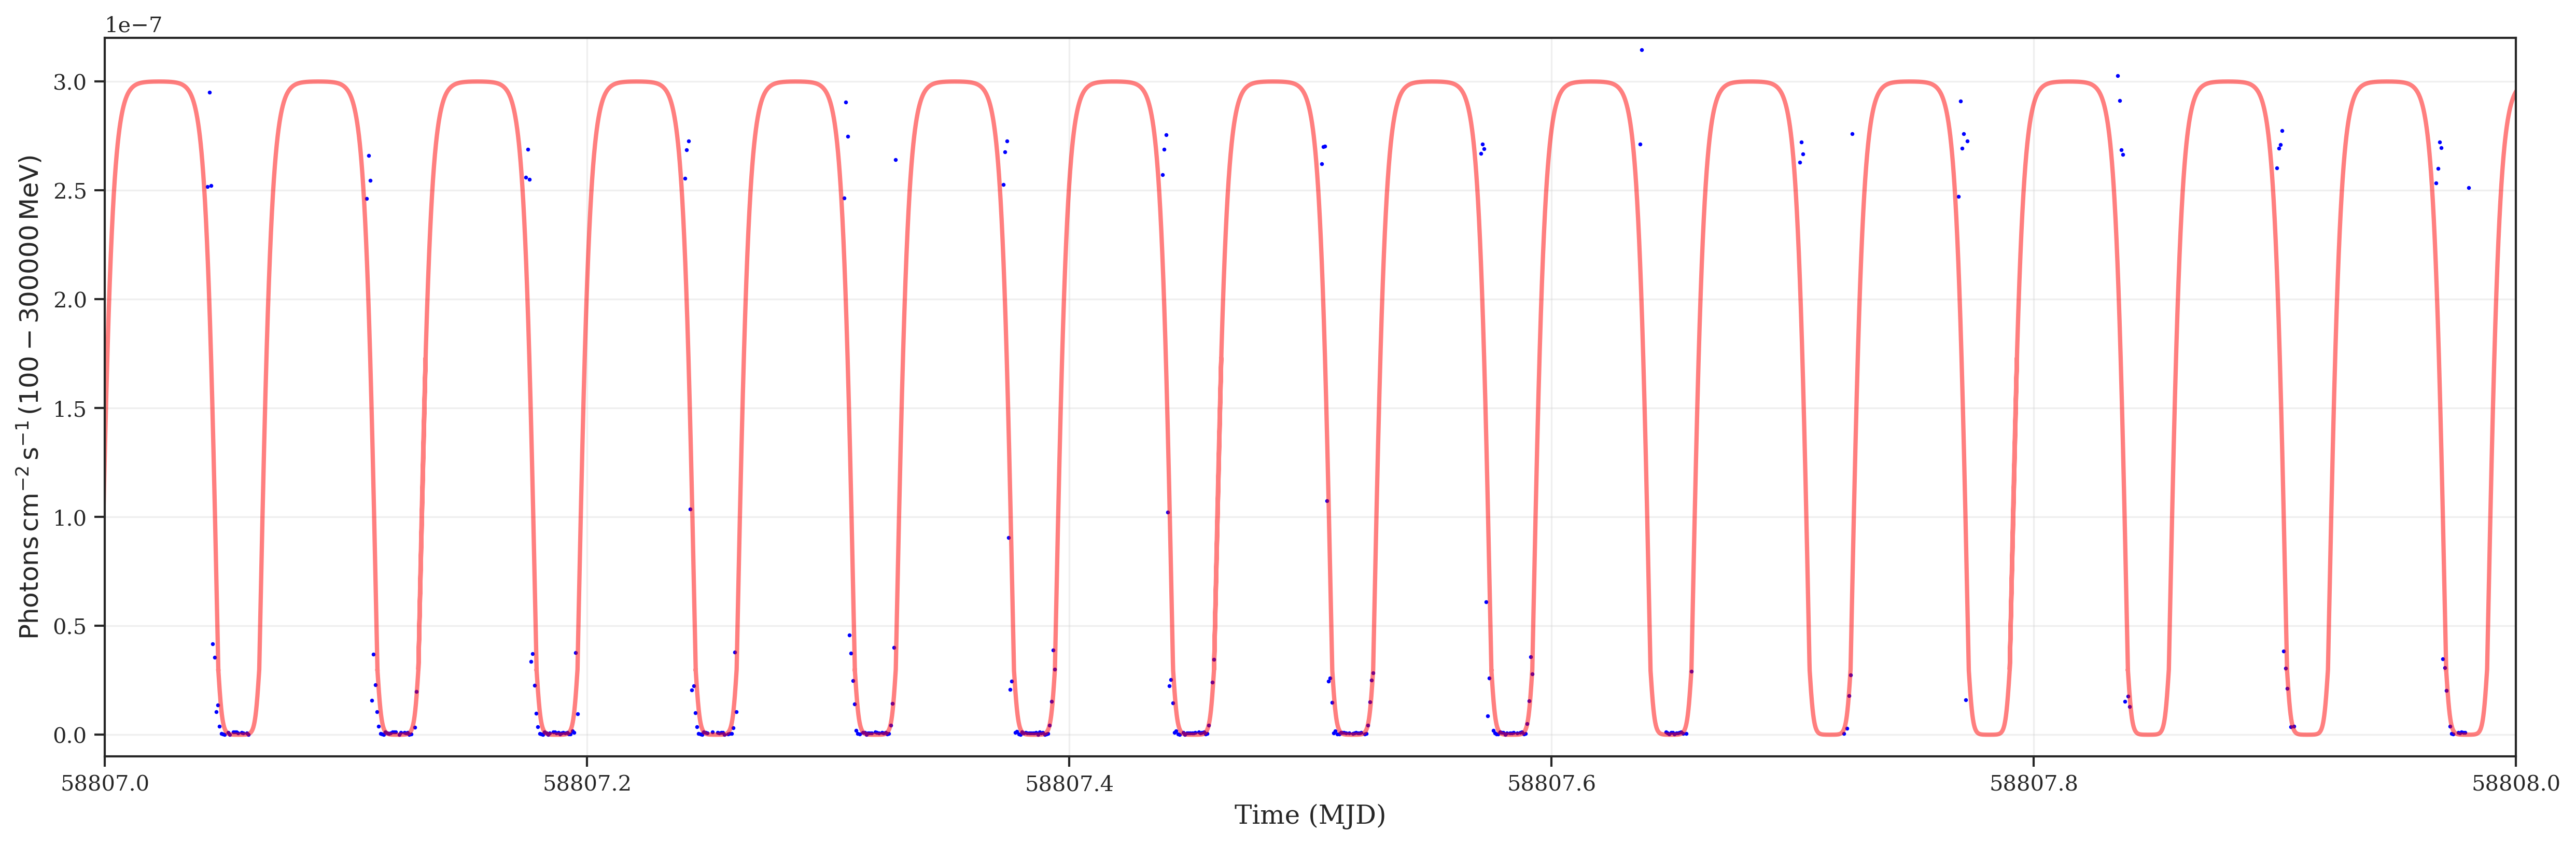

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Configuración avanzada de Seaborn y Matplotlib
sns.set_context("paper", font_scale=1.5)  # Ajuste de tamaño de fuente para publicaciones
sns.set_style("ticks")  # Estilo limpio con ticks visibles
sns.set_palette("muted")  # Paleta de colores suave y profesional

# Configuración adicional de Matplotlib
plt.rcParams.update({
    "axes.titlesize": 14,      # Tamaño de los títulos de los ejes
    "axes.labelsize": 12,      # Tamaño de las etiquetas de los ejes
    "xtick.labelsize": 10,     # Tamaño de las etiquetas del eje X
    "ytick.labelsize": 10,     # Tamaño de las etiquetas del eje Y
    "legend.fontsize": 10,     # Tamaño de la leyenda
    "font.family": "serif",    # Tipo de fuente: preferido en publicaciones científicas
    "figure.dpi": 300,         # Resolución de la figura
    "savefig.dpi": 300,        # Resolución de exportación
    "figure.figsize": (20, 6), # Tamaño de la figura (ajustado)
    "axes.grid": True,         # Activar cuadrícula
    "grid.alpha": 0.3,         # Transparencia de la cuadrícula
    "lines.linewidth": 2,      # Grosor de las líneas
})

# Archivos de entrada
#archivo_linea = "jacobi_3.7e-07_E0.049_S0.017_m0.999_W20.0_desplazamiento10.0_sort.dat"
archivo_linea = "jacobi_3e-07_E0.049_S0.017_m0.999_W20.0_desplazamiento10.0_sort.dat"
archivo_scatter = "sagA_595900805.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] + 58806.8

# Crear la figura y el eje
plt.figure(figsize=(20, 6))

# Graficar la línea (con desplazamiento)
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear listas para datos discontinúos
x_discontinuo = []
y_discontinuo = []

# Insertar NaN para crear discontinuidades
for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN si la diferencia es mayor a 1
    if abs(x_vals[i + 1] - x_vals[i]) > 1:
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua
#plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-', alpha=.1)
plt.plot(x_discontinuo, y_discontinuo, color='red', linestyle='-', alpha=.5)

# Graficar el scatter
#plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='blue', s=1)
plt.scatter(data_scatter['x'], data_scatter['y'],  color='blue', s=1)

# Etiquetas y título
plt.xlabel("Time (MJD)")
plt.ylabel('$\mathrm{Photons \, cm^{-2} \, s^{-1} \, (100-300000 \,  MeV)}$')

# Configurar el eje x para evitar notación científica
ax = plt.gca()  # Obtener el eje actual
ax.ticklabel_format(style='plain', axis='x')  # Desactivar notación científica en el eje x
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # Mostrar valores completos
ax.xaxis.set_minor_formatter(ScalarFormatter(useOffset=False))  # Formato también para menores ticks

# Ajustar los límites del eje x si es necesario (opcional)
plt.xlim(58807, 58808)
plt.ylim(-0.1e-07,3.2e-07)

# Añadir leyenda
plt.legend(loc="upper right", frameon=False, fontsize=12)  # Leyenda más profesional

# Guardar la figura en alta calidad
plt.savefig("images/lightcurve_jacobi_sagA_595900805_sample2.pdf", bbox_inches="tight", format='pdf', dpi=300)

# Mostrar la gráfica
plt.show()


/tmp/ipykernel_5007/1962207530.py:34: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
/tmp/ipykernel_5007/1962207530.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


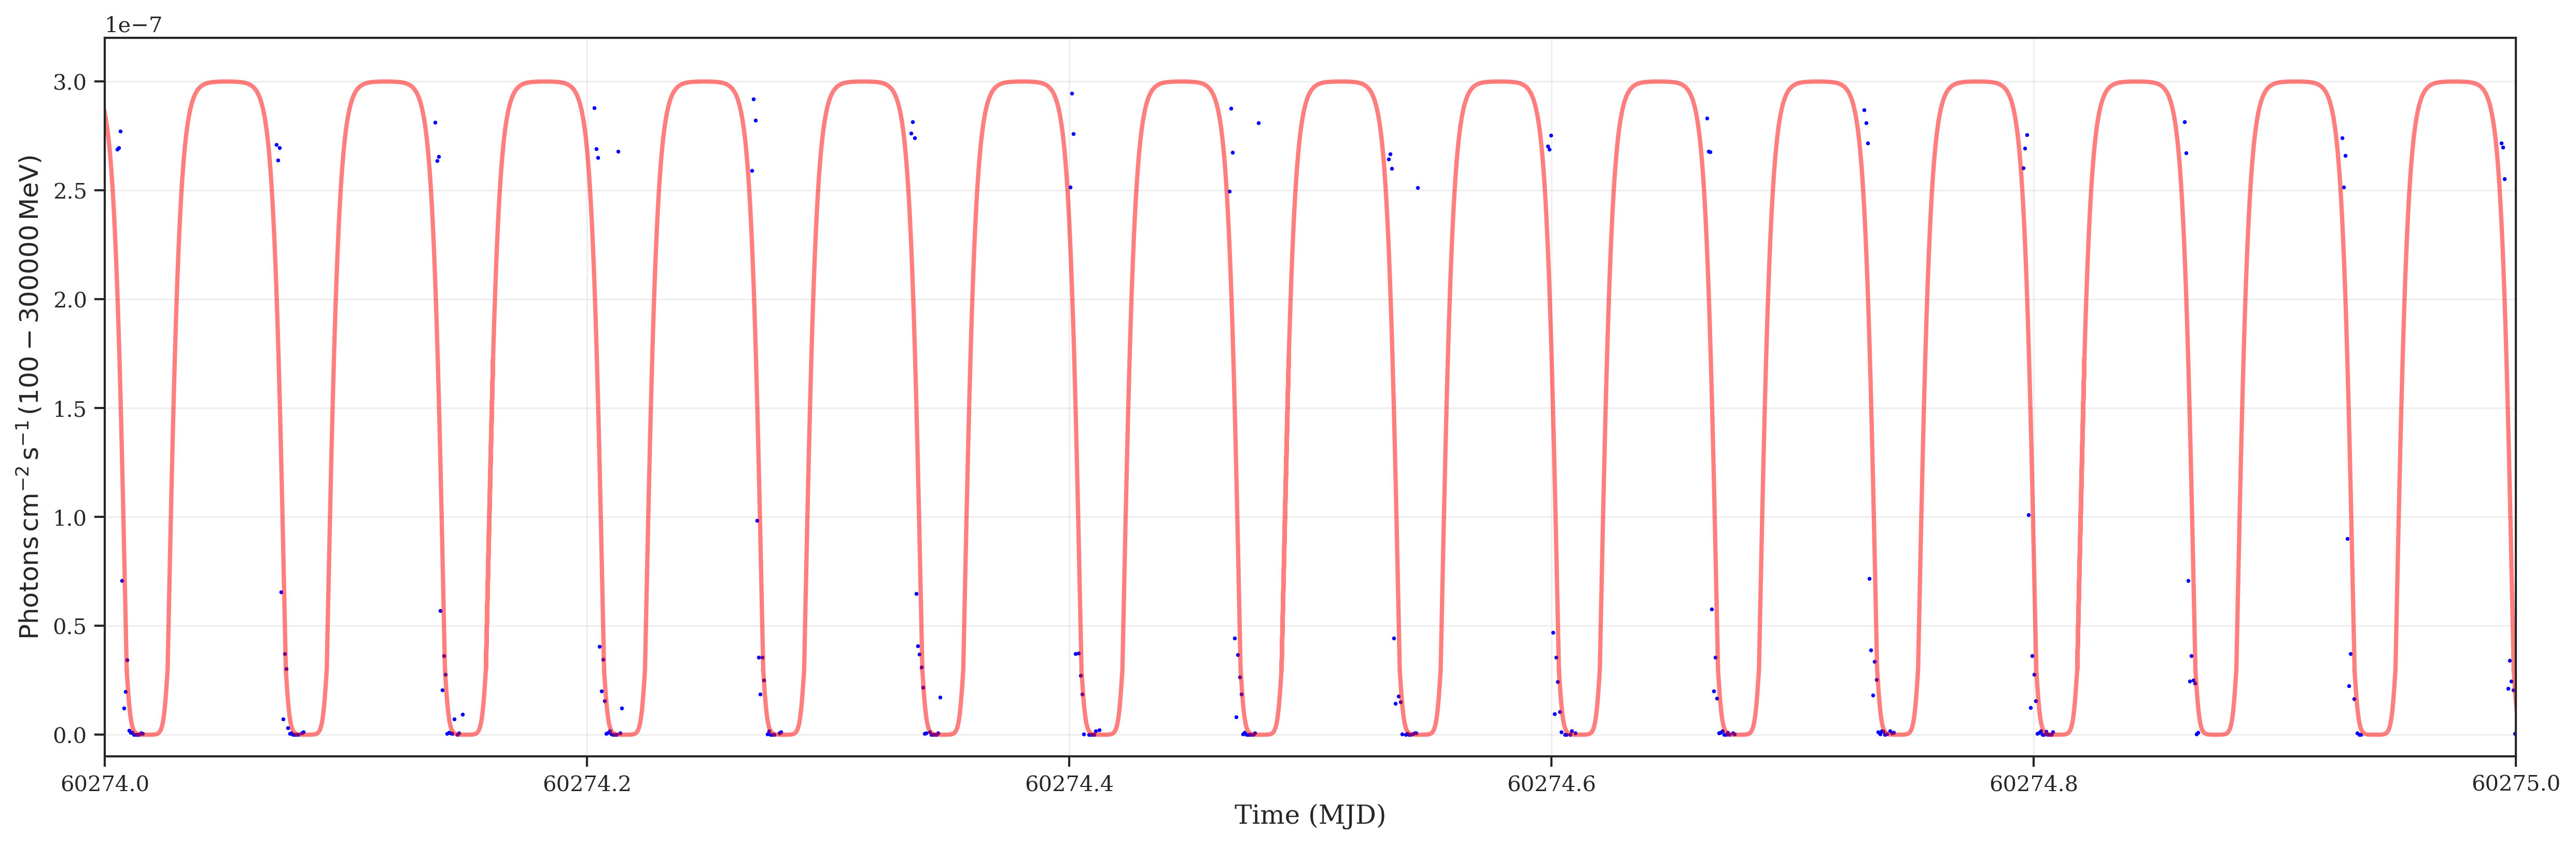

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Configuración avanzada de Seaborn y Matplotlib
sns.set_context("paper", font_scale=1.5)  # Ajuste de tamaño de fuente para publicaciones
sns.set_style("ticks")  # Estilo limpio con ticks visibles
sns.set_palette("muted")  # Paleta de colores suave y profesional

# Configuración adicional de Matplotlib
plt.rcParams.update({
    "axes.titlesize": 14,      # Tamaño de los títulos de los ejes
    "axes.labelsize": 12,      # Tamaño de las etiquetas de los ejes
    "xtick.labelsize": 10,     # Tamaño de las etiquetas del eje X
    "ytick.labelsize": 10,     # Tamaño de las etiquetas del eje Y
    "legend.fontsize": 10,     # Tamaño de la leyenda
    "font.family": "serif",    # Tipo de fuente: preferido en publicaciones científicas
    "figure.dpi": 300,         # Resolución de la figura
    "savefig.dpi": 300,        # Resolución de exportación
    "figure.figsize": (20, 6), # Tamaño de la figura (ajustado)
    "axes.grid": True,         # Activar cuadrícula
    "grid.alpha": 0.3,         # Transparencia de la cuadrícula
    "lines.linewidth": 2,      # Grosor de las líneas
})

# Archivos de entrada
#archivo_linea = "jacobi_3.7e-07_E0.049_S0.017_m0.999_W20.0_desplazamiento10.0_sort.dat"
archivo_linea = "jacobi_3e-07_E0.049_S0.017_m0.999_W20.0_desplazamiento10.0_sort.dat"
archivo_scatter = "sagA_722649605.dat"

# Leer los archivos con columnas 'x' y 'y' y eliminar comentarios
data_linea = pd.read_csv(archivo_linea, comment='#', header=None, names=["x", "y"], delim_whitespace=True)
data_scatter = pd.read_csv(archivo_scatter, comment='#', header=None, names=["x", "y", "z"], delim_whitespace=True)

# Convertir a float y eliminar filas con valores no numéricos o NaN
data_linea = data_linea.apply(pd.to_numeric, errors='coerce').dropna()
data_scatter = data_scatter.apply(pd.to_numeric, errors='coerce').dropna()

# Desplazar los datos de la línea 10 minutos hacia la izquierda
data_linea['x'] = data_linea['x'] + 60273.828 

# Crear la figura y el eje
plt.figure(figsize=(20, 6))

# Graficar la línea (con desplazamiento)
x_vals = data_linea['x'].values
y_vals = data_linea['y'].values

# Crear listas para datos discontinúos
x_discontinuo = []
y_discontinuo = []

# Insertar NaN para crear discontinuidades
for i in range(len(x_vals) - 1):
    x_discontinuo.append(x_vals[i])
    y_discontinuo.append(y_vals[i])
    
    # Insertar NaN si la diferencia es mayor a 1
    if abs(x_vals[i + 1] - x_vals[i]) > 1:
        x_discontinuo.append(np.nan)
        y_discontinuo.append(np.nan)

# Añadir el último valor
x_discontinuo.append(x_vals[-1])
y_discontinuo.append(y_vals[-1])

# Graficar la línea discontinua
#plt.plot(x_discontinuo, y_discontinuo, label="Jacobi Elliptical", color='blue', linestyle='-', alpha=.1)
plt.plot(x_discontinuo, y_discontinuo, color='red', linestyle='-', alpha=.5)

# Graficar el scatter
#plt.scatter(data_scatter['x'], data_scatter['y'], label="Phasefold", color='blue', s=1)
plt.scatter(data_scatter['x'], data_scatter['y'],  color='blue', s=1)

# Etiquetas y título
plt.xlabel("Time (MJD)")
plt.ylabel('$\mathrm{Photons \, cm^{-2} \, s^{-1} \, (100-300000 \,  MeV)}$')

# Configurar el eje x para evitar notación científica
ax = plt.gca()  # Obtener el eje actual
ax.ticklabel_format(style='plain', axis='x')  # Desactivar notación científica en el eje x
ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))  # Mostrar valores completos
ax.xaxis.set_minor_formatter(ScalarFormatter(useOffset=False))  # Formato también para menores ticks

# Ajustar los límites del eje x si es necesario (opcional)
plt.xlim(60274, 60275)
plt.ylim(-0.1e-07,3.2e-07)

# Añadir leyenda
plt.legend(loc="upper right", frameon=False, fontsize=12)  # Leyenda más profesional

# Guardar la figura en alta calidad
plt.savefig("images/lightcurve_jacobi_sagA_595900805_sample2a.pdf", bbox_inches="tight", format='pdf', dpi=300)

# Mostrar la gráfica
plt.show()